# <a name="0">Hierarchical Clustering</a>

1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">K means</a>
6. <a href="#5">Training datasets</a>
7. <a href="#6">Improvement ideas</a>



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [3]:
#read the data

data_path = 'D:\BME\ITI AI\ML(unsupervised)\CC GENERAL.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [3]:
# data type for each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [26]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [3]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
# feel free to investigate what you want

In [7]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
df.duplicated().sum()
# no duplicates

0

array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

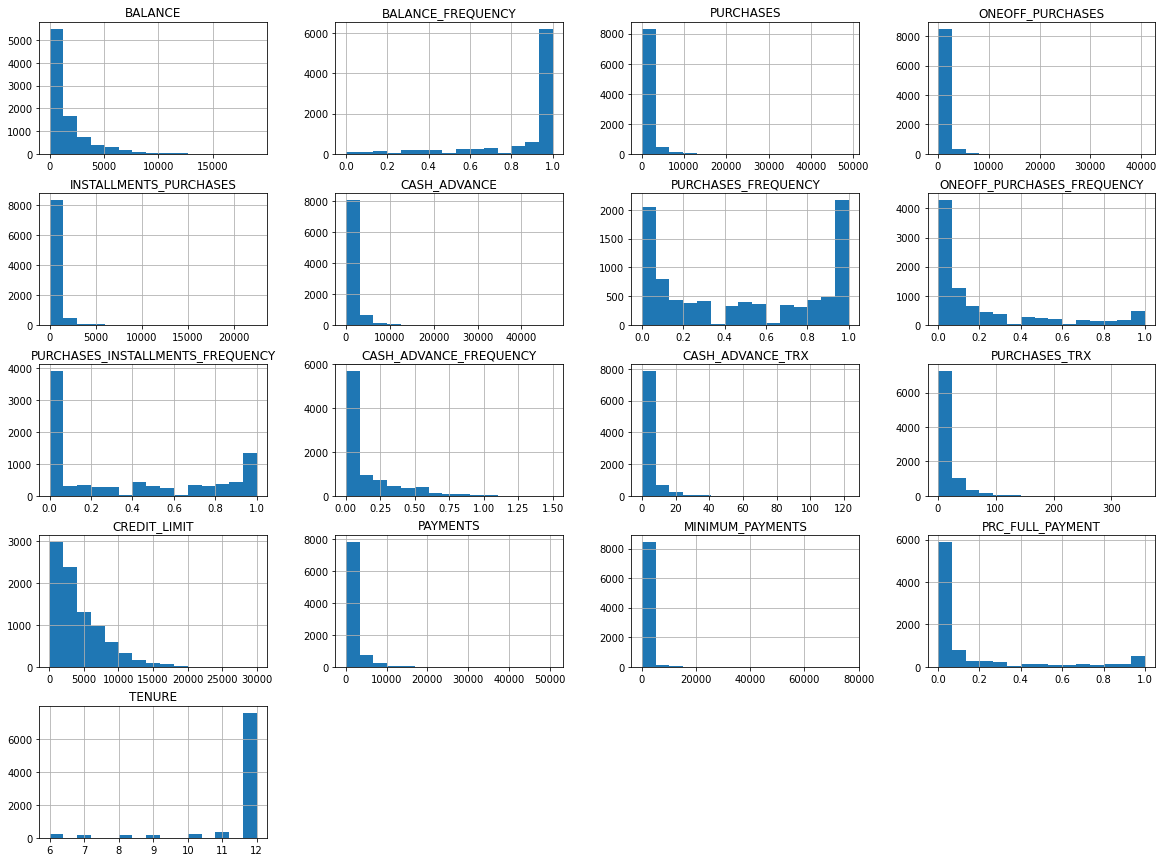

In [5]:
cols=df.select_dtypes(include=['object']).columns.tolist()
n_cols=df.select_dtypes(exclude=["object"]).columns.tolist()
df[n_cols].hist(bins=15,figsize=(20,15),layout=(5,4))


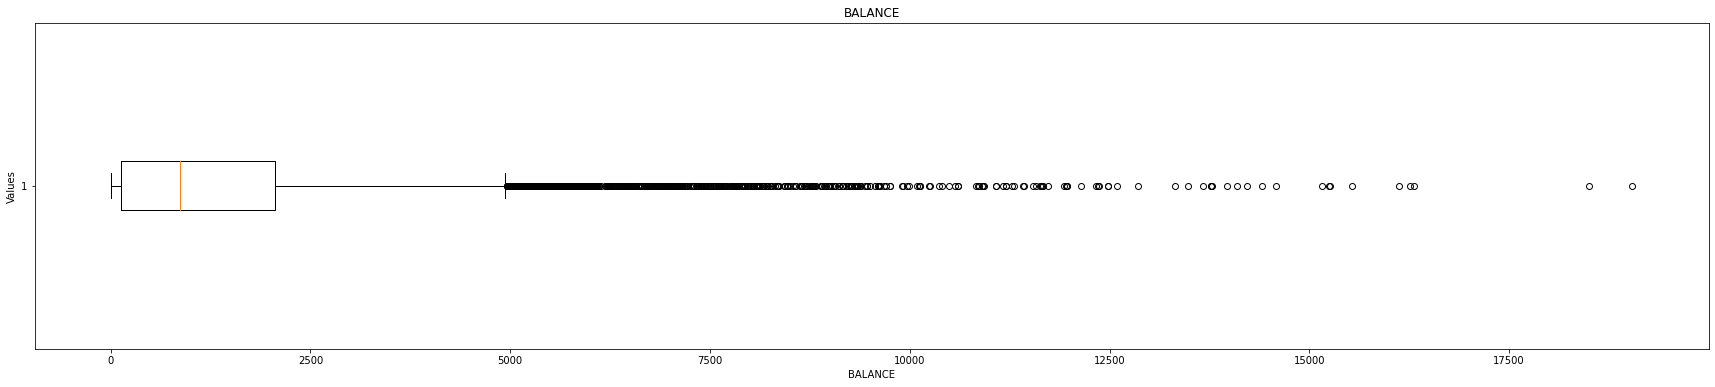

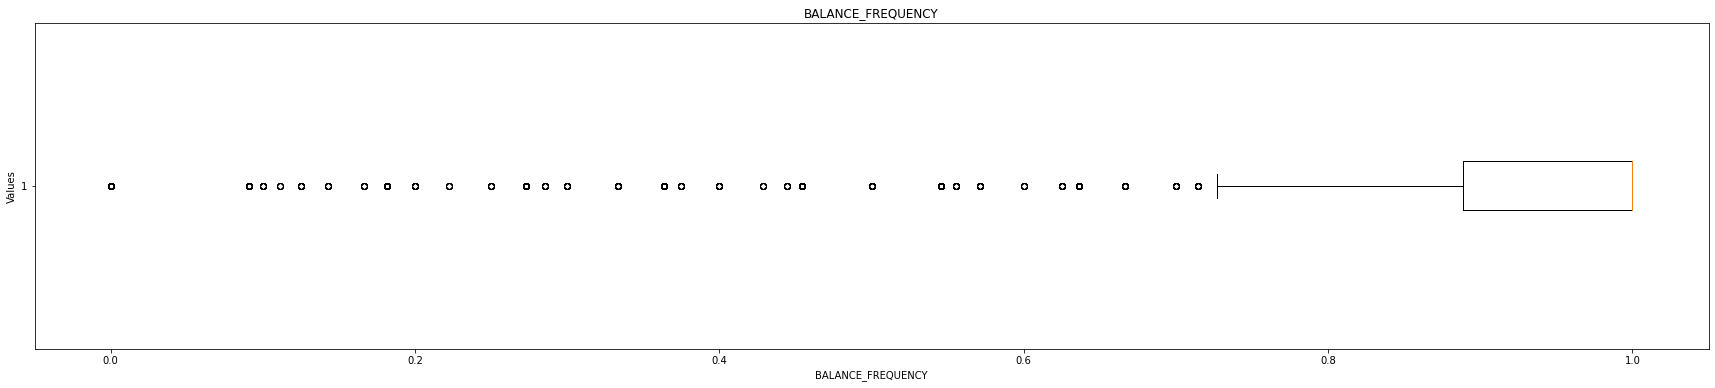

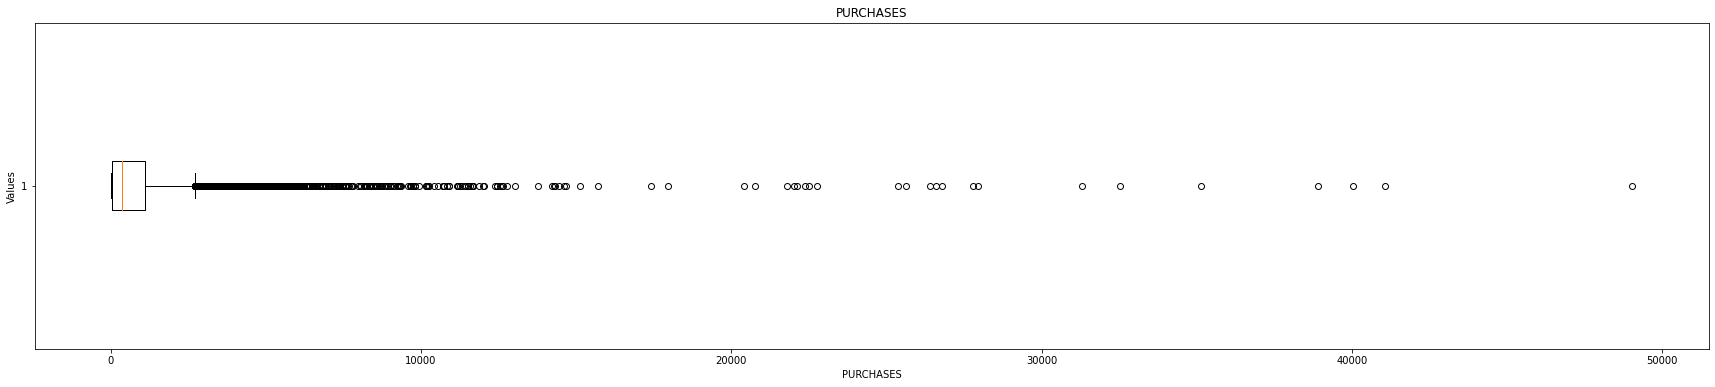

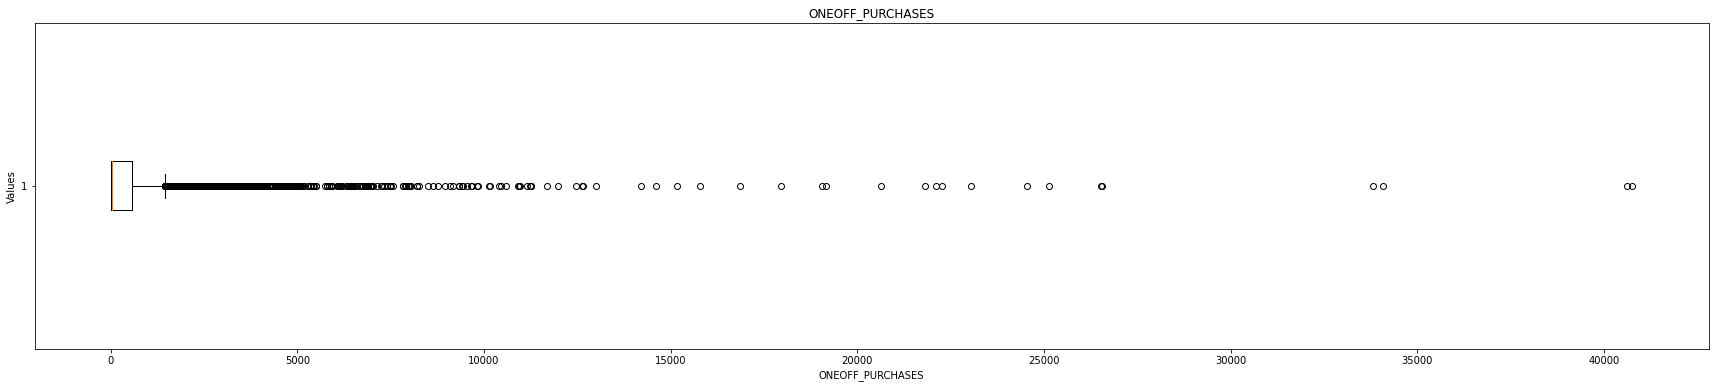

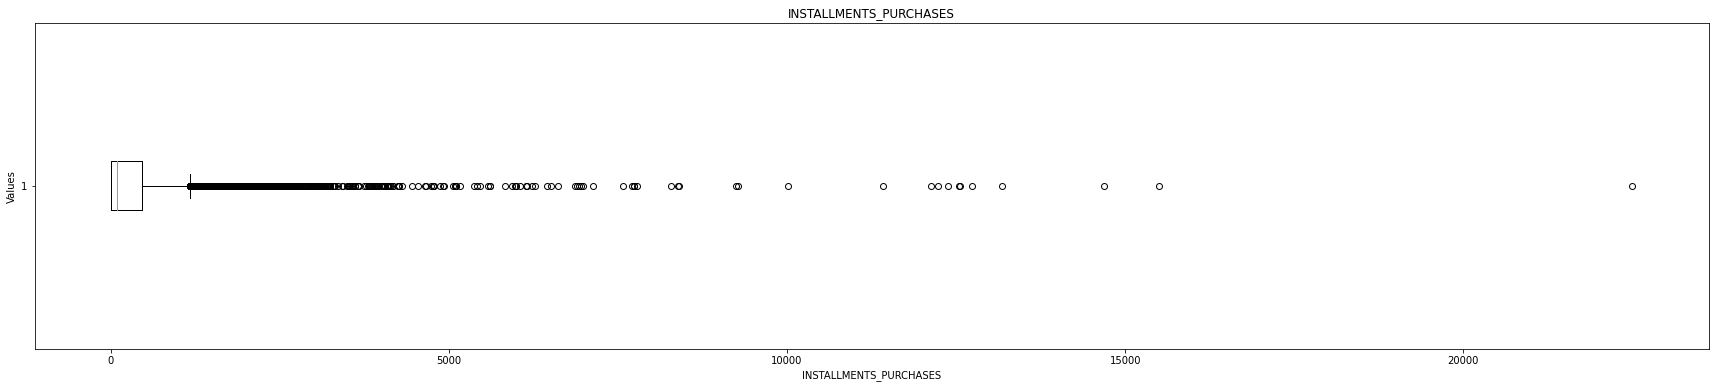

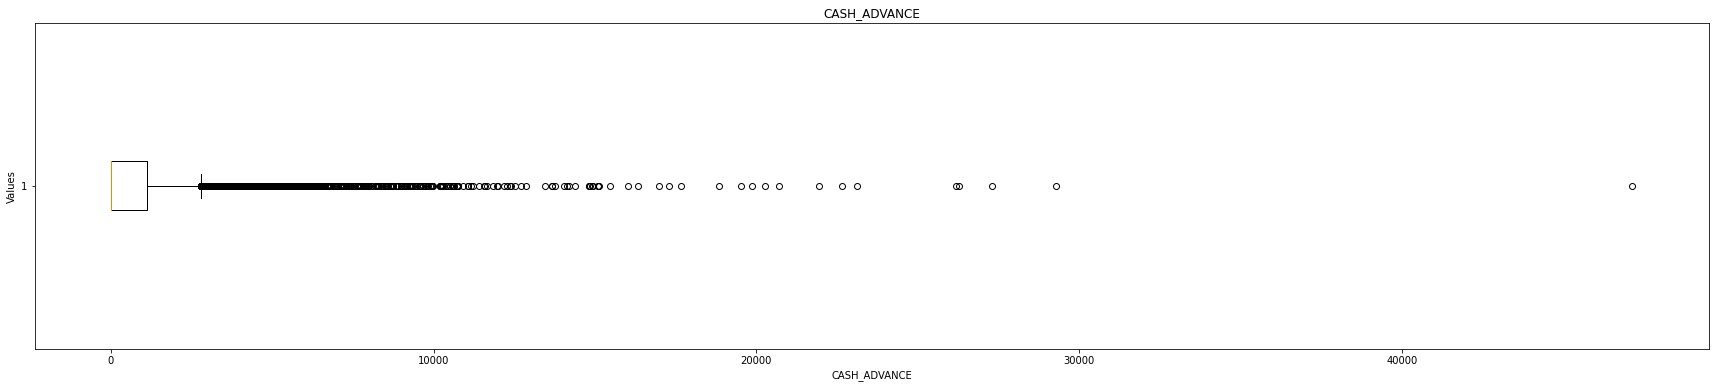

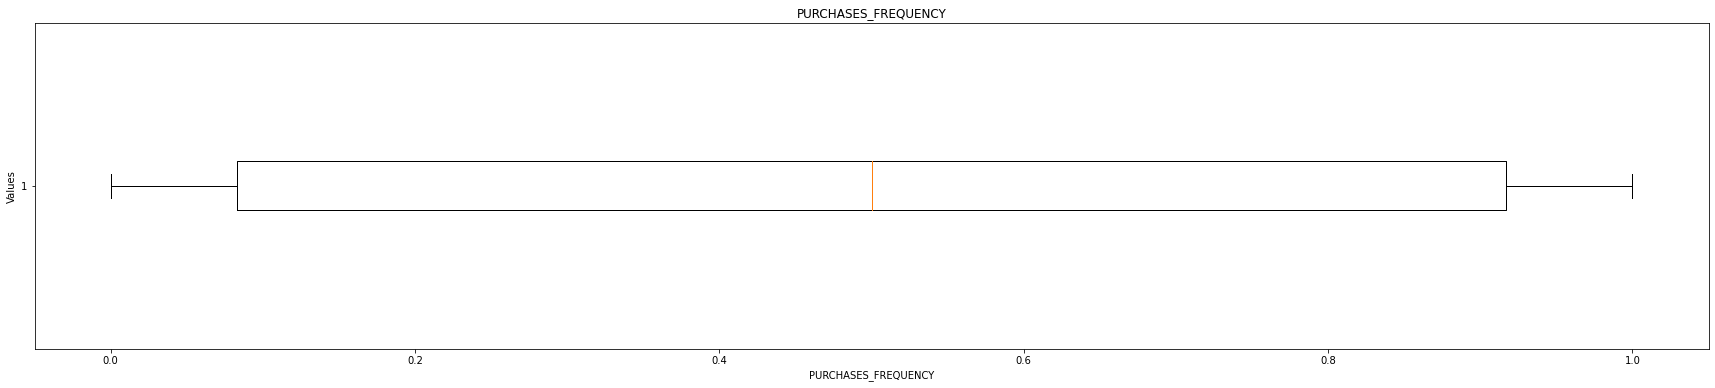

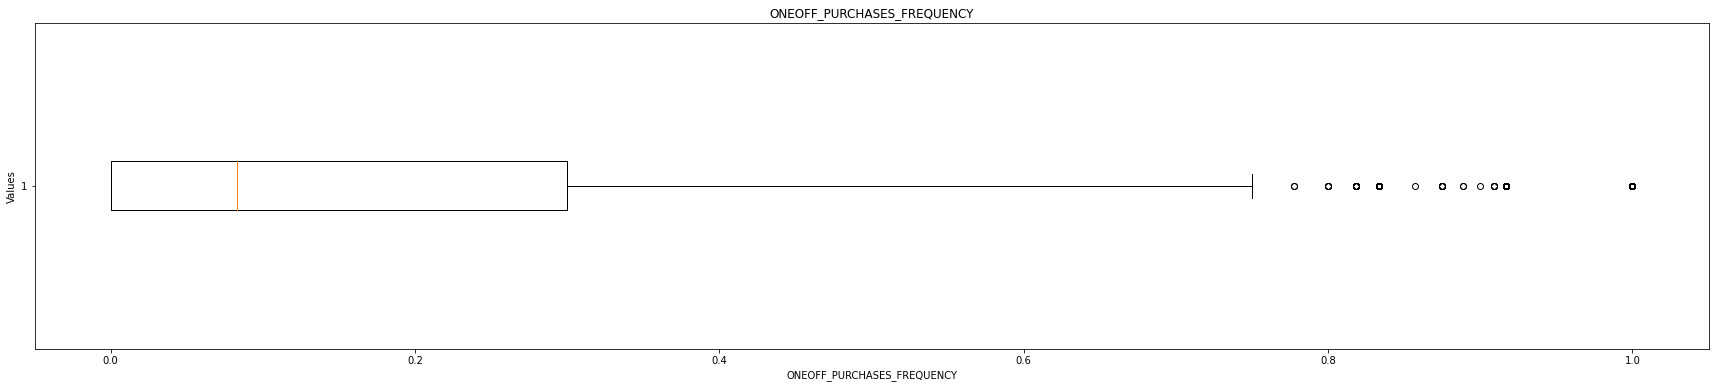

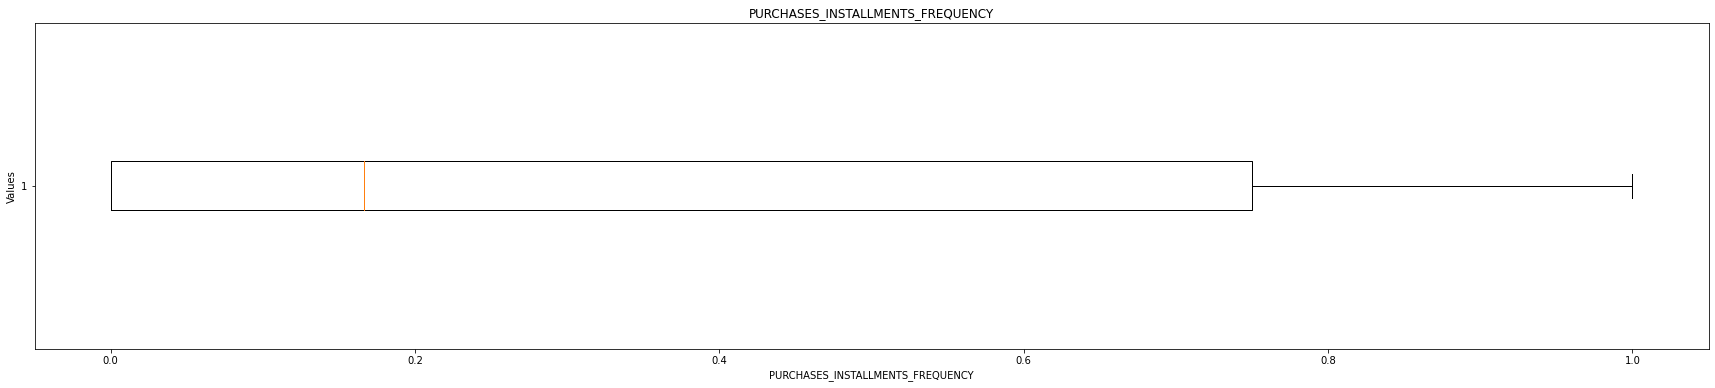

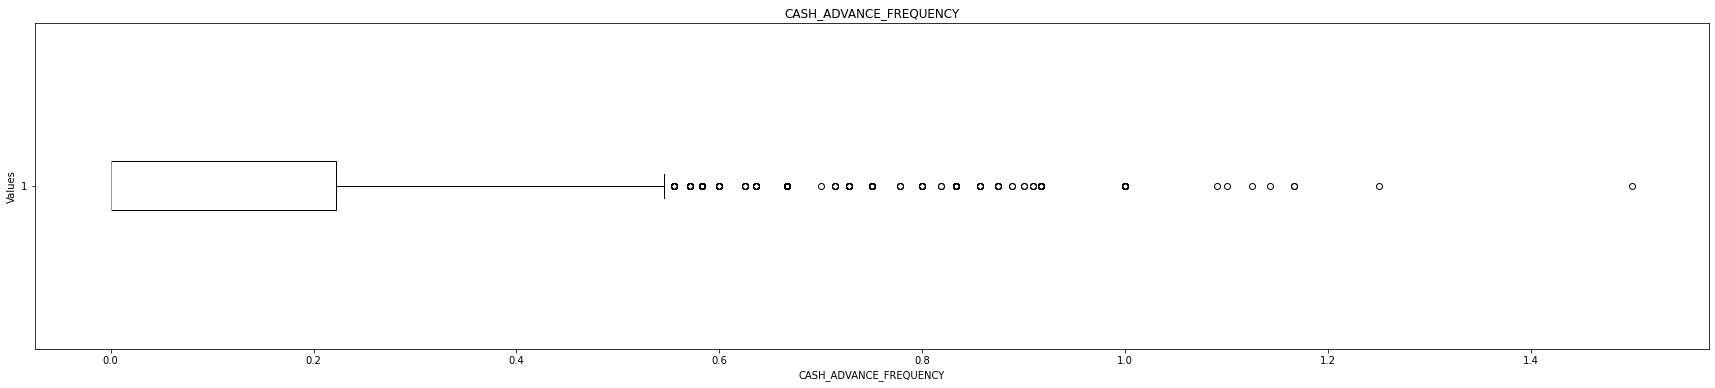

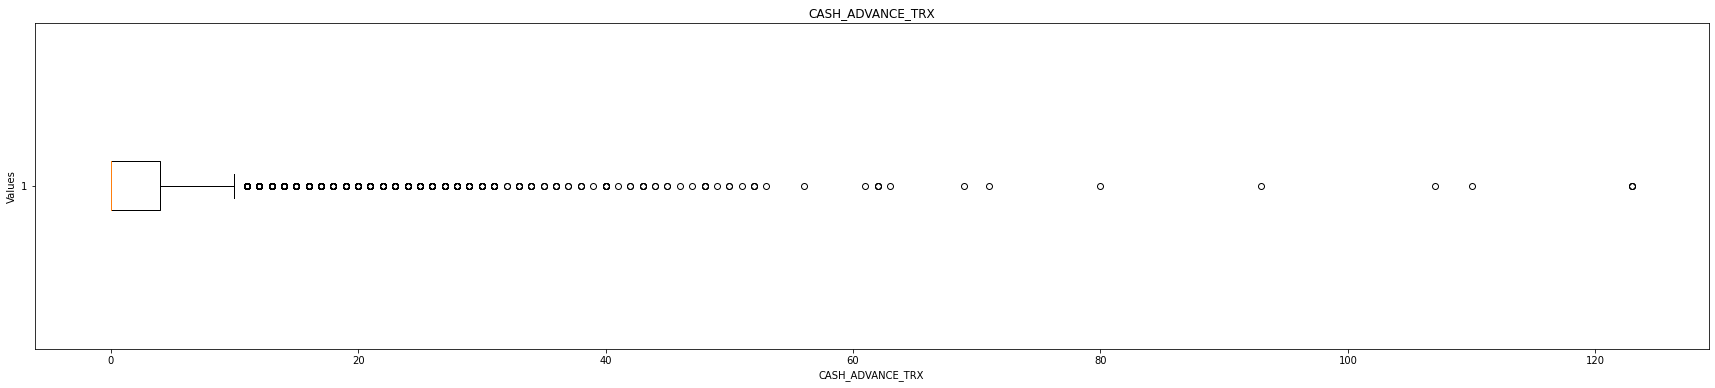

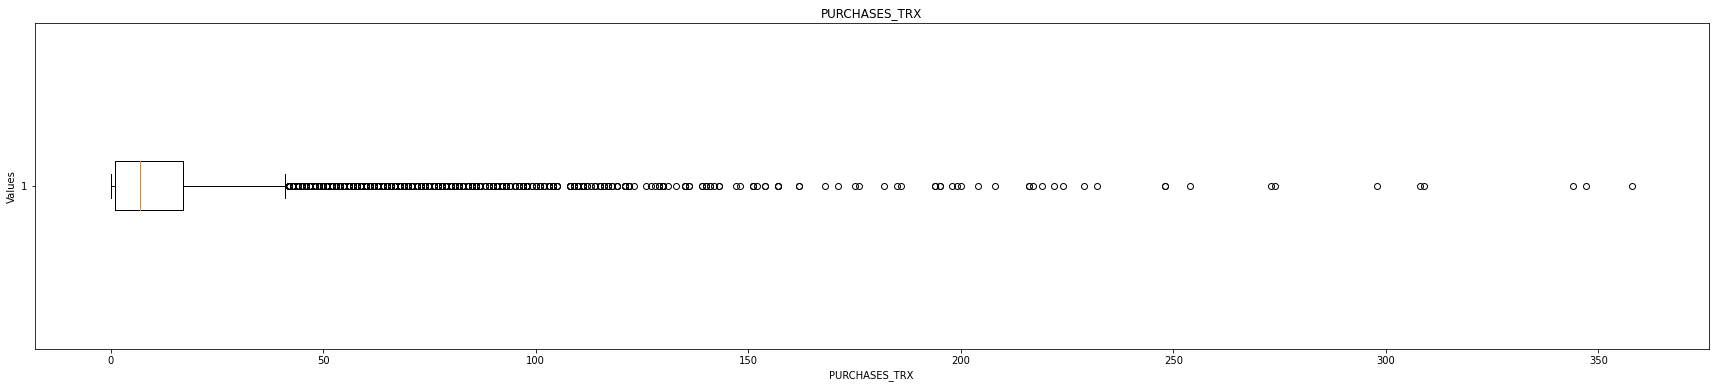

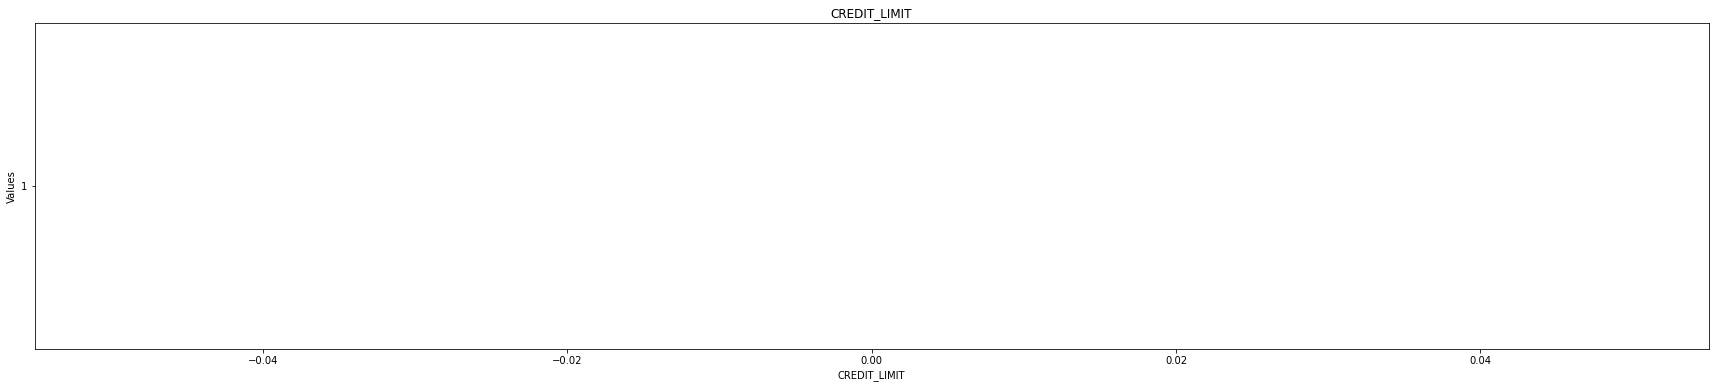

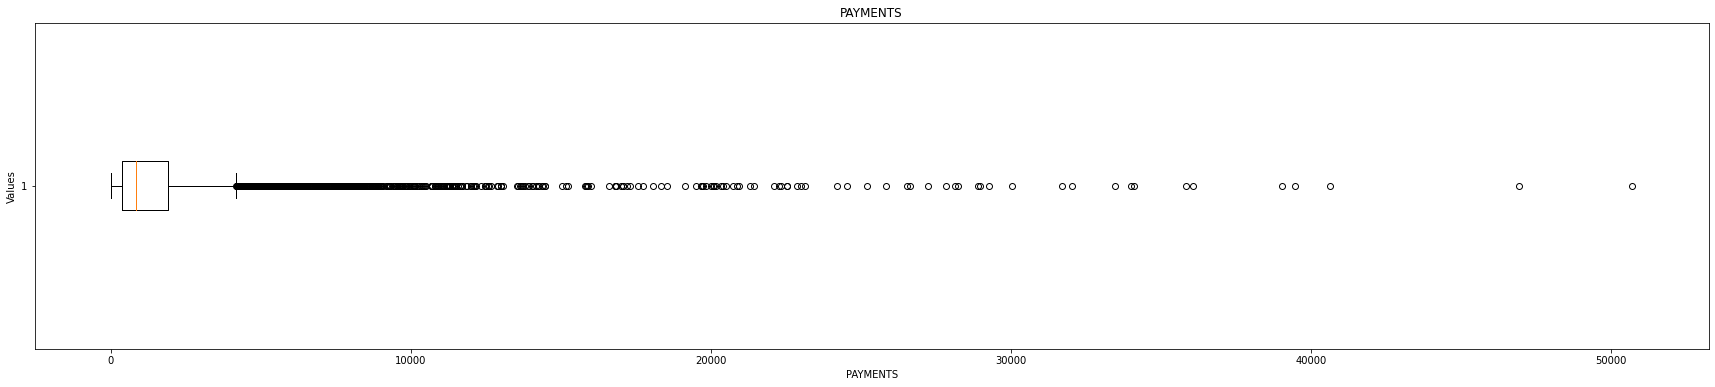

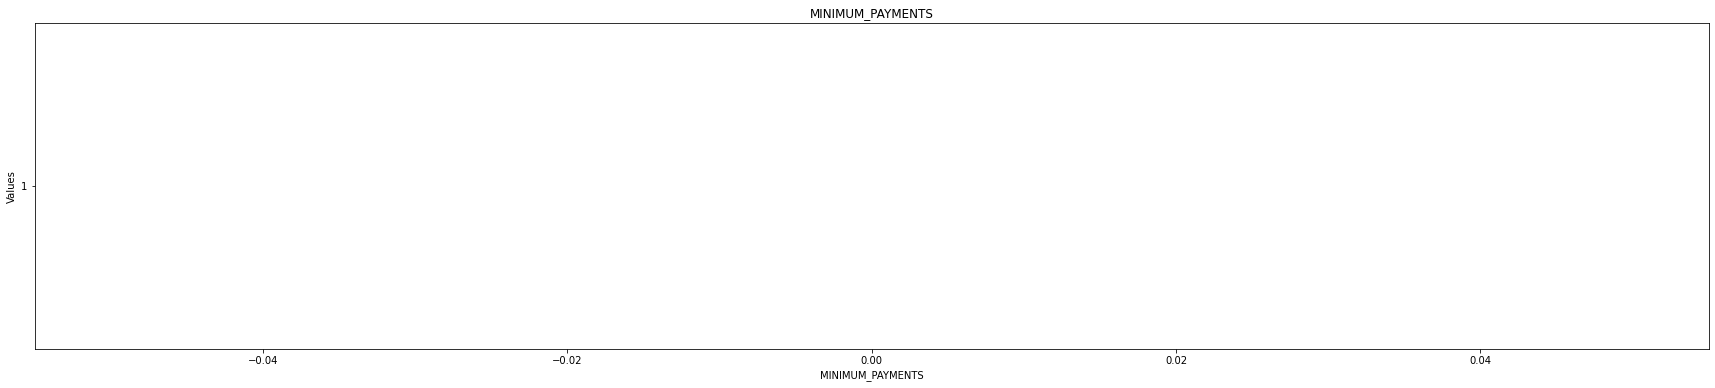

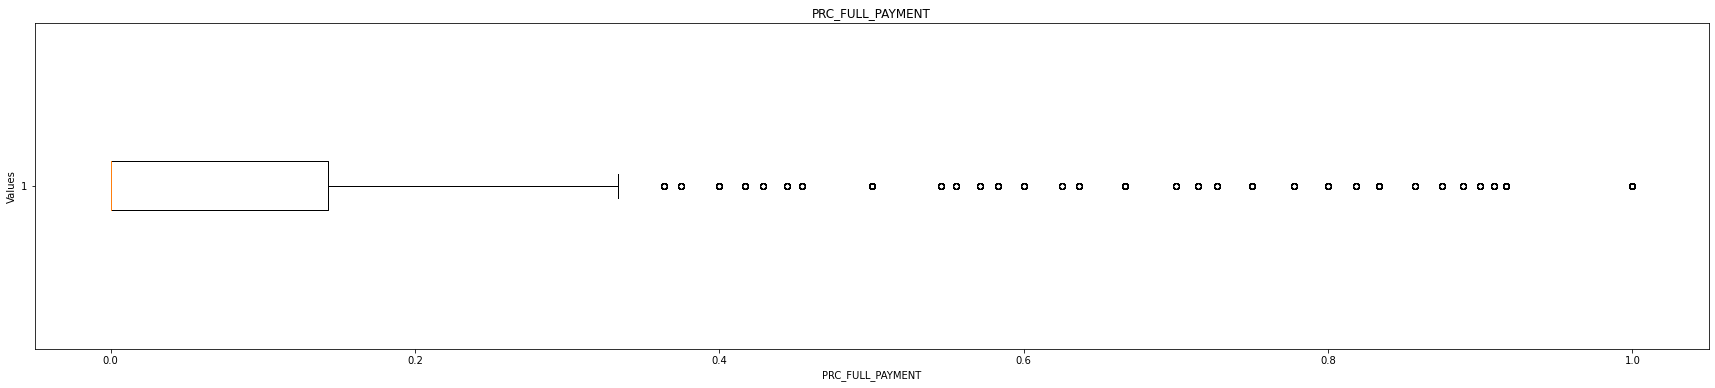

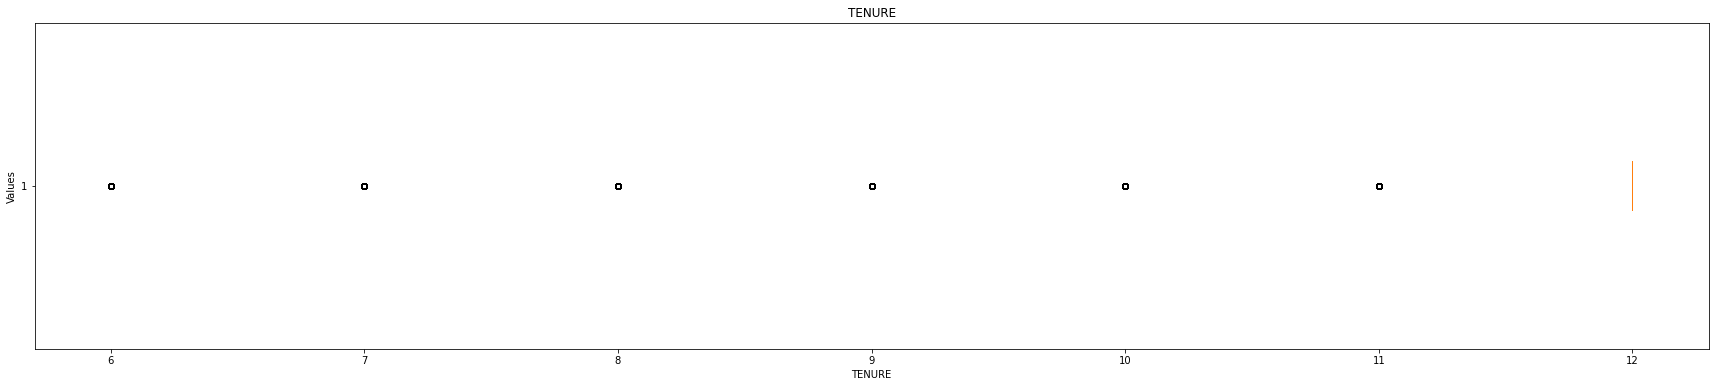

In [44]:
# outliers
for column in df.columns[1:]:
    plt.figure(figsize=(30, 6))
    plt.boxplot(df[column], vert=False)
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.title(column)
    plt.show()


## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- there are nulls in minimum payment and credit limit <br>
2- some outliers         <br>
3- the cash in advance Frequency has some values > 1        <br>

In [94]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

In [95]:
#solution
# The null

df_copy['MINIMUM_PAYMENTS']=df_copy['MINIMUM_PAYMENTS'].fillna(df_copy['MINIMUM_PAYMENTS'].median())
df_copy['CREDIT_LIMIT'] = df_copy['CREDIT_LIMIT'].fillna(df_copy['CREDIT_LIMIT'].median())


In [140]:
#test 

df_copy.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

second issue

In [96]:
# solution
df_copy[df_copy['CASH_ADVANCE_FREQUENCY']>1]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
681,C10708,5656.069801,1.000000,362.36,362.36,0.0,7240.433194,0.250000,0.250000,0.0,1.250000,12,2,8000.0,683.421497,2036.877611,0.0,8
1626,C11680,2876.009336,1.000000,152.61,152.61,0.0,3719.650168,0.333333,0.333333,0.0,1.166667,24,2,4000.0,248.342971,584.926336,0.0,6
2555,C12629,5906.184924,1.000000,141.80,141.80,0.0,1651.286918,0.125000,0.125000,0.0,1.125000,12,2,10000.0,933.969974,919.289675,0.0,8
2608,C12684,7801.511533,1.000000,231.40,231.40,0.0,4109.465221,0.100000,0.100000,0.0,1.100000,20,3,13500.0,1593.617739,1522.496755,0.0,10
3038,C13127,3846.742530,1.000000,0.00,0.00,0.0,1932.460679,0.000000,0.000000,0.0,1.500000,18,0,5600.0,496.245836,538.346874,0.0,6
3253,C13347,5709.486507,0.833333,0.00,0.00,0.0,2794.326341,0.000000,0.000000,0.0,1.166667,10,0,6000.0,550.513331,1299.463370,0.0,6
8055,C18273,1917.895730,1.000000,285.07,285.07,0.0,6084.858872,0.363636,0.363636,0.0,1.090909,28,6,3000.0,5692.682993,556.449635,0.0,11
8365,C18588,3857.562230,1.000000,0.00,0.00,0.0,2127.213754,0.000000,0.000000,0.0,1.142857,26,0,5000.0,617.508991,538.396872,0.0,7


In [97]:
df_copy = df_copy[df_copy['CASH_ADVANCE_FREQUENCY']<=1]
df_copy

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


**Third issue**

In [8]:
# Outliers
col_names = ['BALANCE', 'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','CASH_ADVANCE', 'PAYMENTS','PURCHASES_TRX','MINIMUM_PAYMENTS']
features = df_copy[col_names]

df_log = pd.DataFrame()
for c in col_names:
    modified_col = np.log(features[c] + 1e-2)
    df_log[c] = modified_col

df_log

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PAYMENTS,PURCHASES_TRX,MINIMUM_PAYMENTS
0,3.711393,4.558183,-4.605170,4.558183,-4.605170,5.307337,0.698135,4.938206
1,8.071680,-4.605170,-4.605170,-4.605170,8.770743,8.319484,-4.605170,6.977608
2,7.822108,6.650512,6.650512,-4.605170,-4.605170,6.433063,2.485740,6.441417
3,7.418589,7.312560,7.312560,-4.605170,5.326895,-4.605170,0.009950,5.744137
4,6.706525,2.773214,2.773214,-4.605170,-4.605170,6.519656,0.009950,5.500447
...,...,...,...,...,...,...,...,...
8945,3.350027,5.673770,-4.605170,5.673770,-4.605170,5.785683,1.793425,3.889703
8946,2.954557,5.703816,-4.605170,5.703816,-4.605170,5.619935,1.793425,5.744137
8947,3.153107,4.972656,-4.605170,4.972656,-4.605170,4.397910,1.611436,4.411930
8948,2.600284,-4.605170,-4.605170,-4.605170,3.599195,3.961955,-4.605170,4.021158


In [34]:
df_log.describe()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PAYMENTS,PURCHASES_TRX,MINIMUM_PAYMENTS
count,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000
mean,6.092799,3.843909,0.982476,1.339733,0.929890,6.497988,0.716331,5.907953
std,2.238529,4.750940,5.480248,5.311396,5.813532,2.177787,3.080607,1.189378
min,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-3.534854
25%,4.852404,3.684306,-4.605170,-4.605170,-4.605170,5.948693,0.009950,5.140422
50%,6.770144,5.892514,3.637849,4.494518,-4.605170,6.753797,1.947338,5.744137
75%,7.623963,7.012975,6.360473,6.150848,7.014022,7.551076,2.833801,6.669037
max,9.854463,10.800383,10.615487,10.021271,10.760818,10.834105,5.880561,11.243819


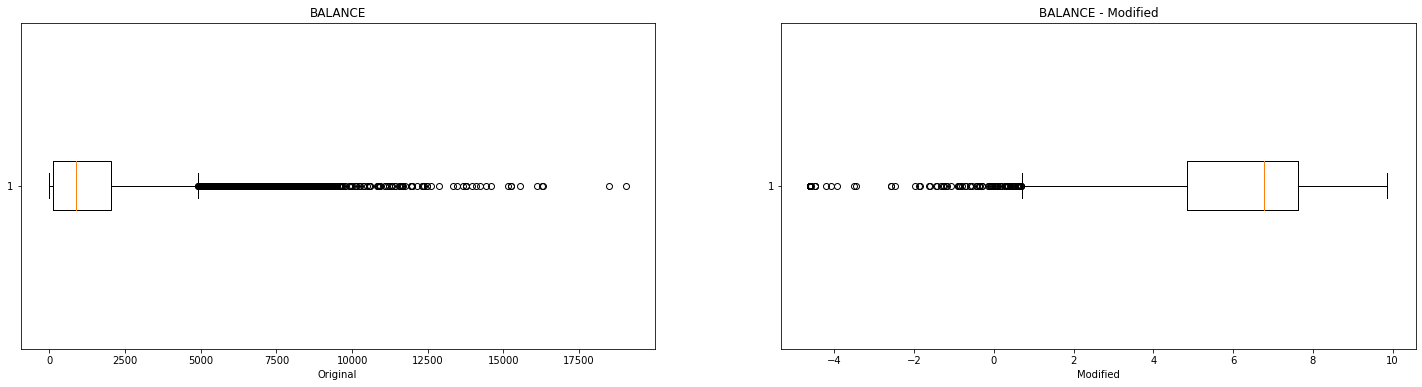

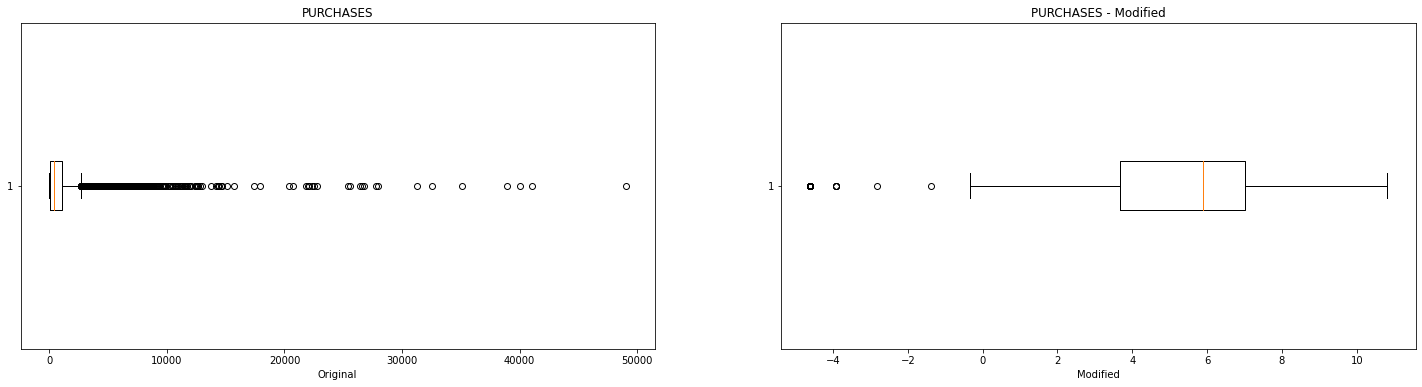

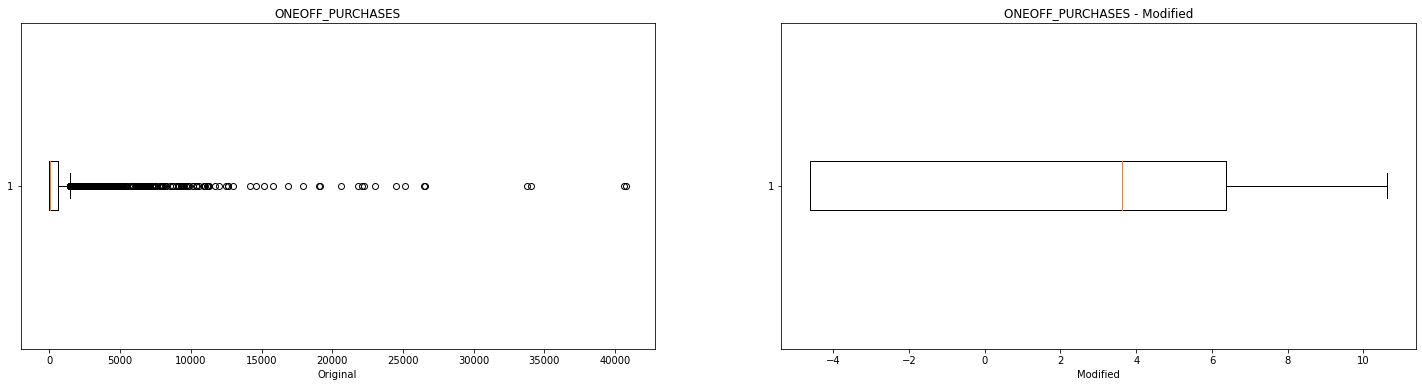

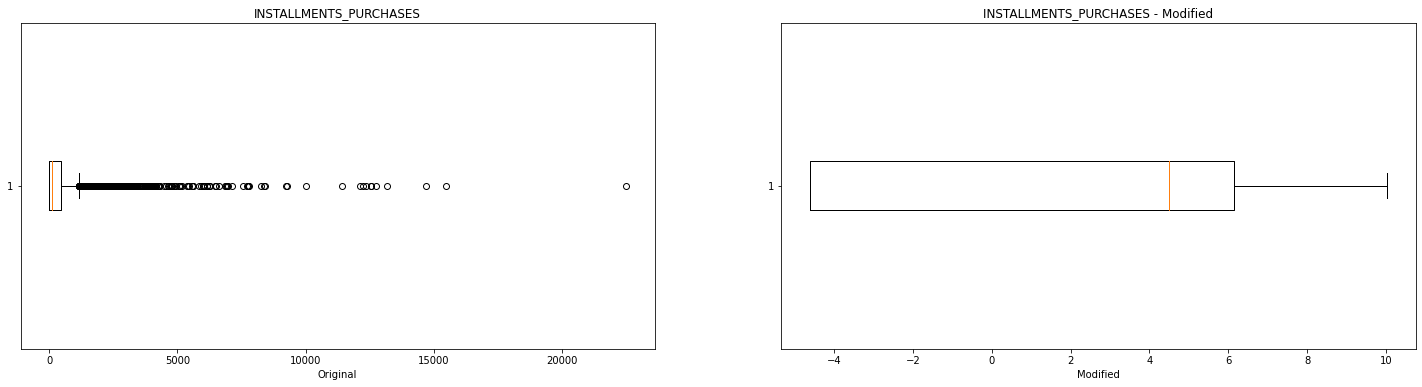

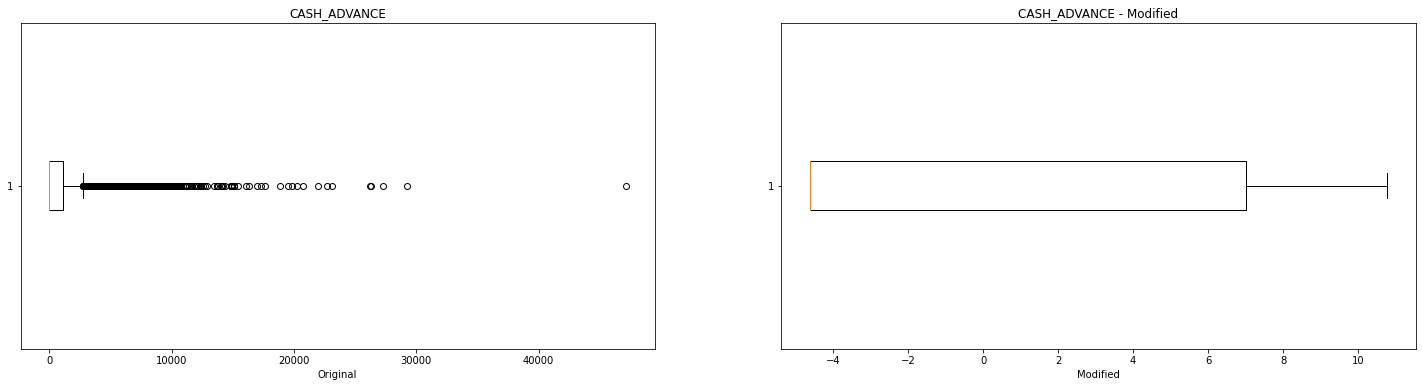

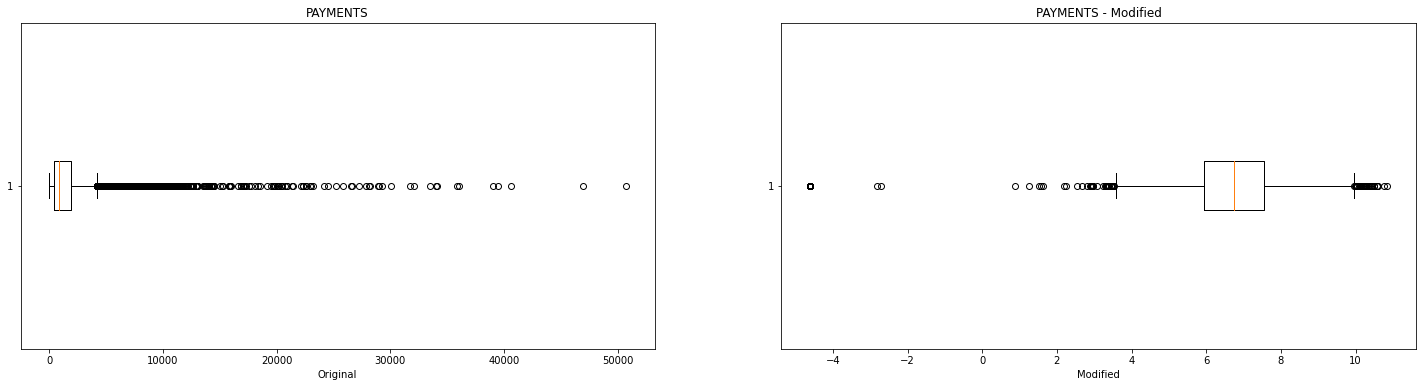

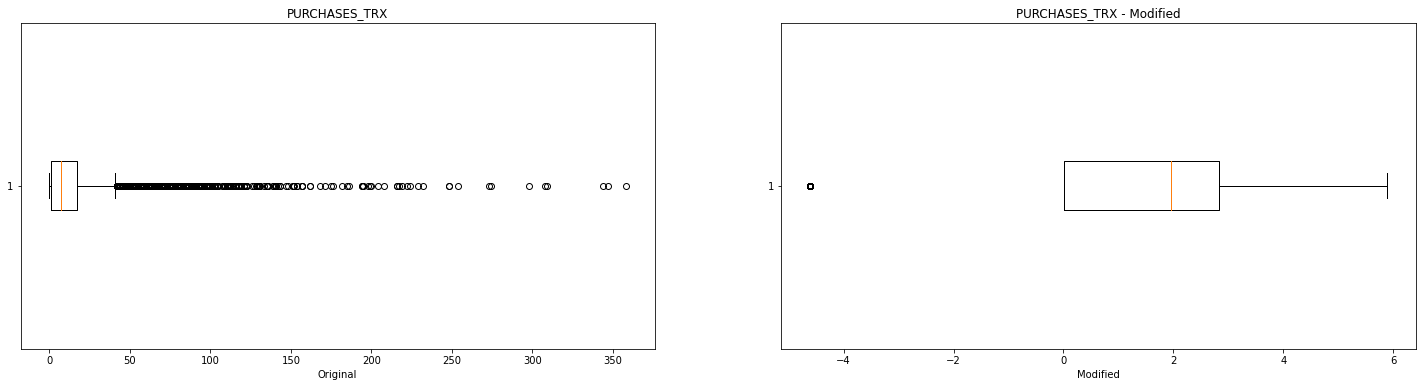

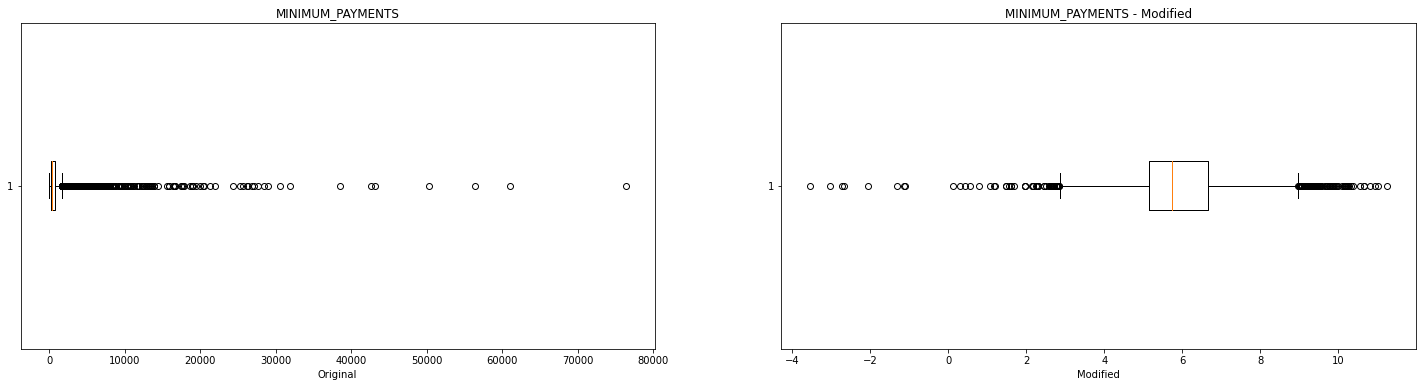

In [35]:
for column in col_names:
    plt.figure(figsize=(25, 6))
    
    if column in df_log.columns:
        # Plot boxplot for original dataframe (df_copy)
        plt.subplot(1, 2, 1)
        plt.boxplot(df_copy[column], vert=False)
        plt.xlabel('Original')
        plt.title(column )

        # Plot boxplot for modified dataframe (df_log)
        plt.subplot(1, 2, 2)
        plt.boxplot(df_log[column], vert=False)
        plt.xlabel('Modified')
        plt.title(column + ' - Modified')

        plt.show()

In [9]:

df_new = df_copy.copy()

for c in col_names:
    df_new[c] = df_log[c]

df_new = df_new.reindex(columns=df_copy.columns)

df_new


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,3.711393,0.818182,4.558183,-4.605170,4.558183,-4.605170,0.166667,0.000000,0.083333,0.000000,0,0.698135,1000.0,5.307337,4.938206,0.000000,12
1,C10002,8.071680,0.909091,-4.605170,-4.605170,-4.605170,8.770743,0.000000,0.000000,0.000000,0.250000,4,-4.605170,7000.0,8.319484,6.977608,0.222222,12
2,C10003,7.822108,1.000000,6.650512,6.650512,-4.605170,-4.605170,1.000000,1.000000,0.000000,0.000000,0,2.485740,7500.0,6.433063,6.441417,0.000000,12
3,C10004,7.418589,0.636364,7.312560,7.312560,-4.605170,5.326895,0.083333,0.083333,0.000000,0.083333,1,0.009950,7500.0,-4.605170,5.744137,0.000000,12
4,C10005,6.706525,1.000000,2.773214,2.773214,-4.605170,-4.605170,0.083333,0.083333,0.000000,0.000000,0,0.009950,1200.0,6.519656,5.500447,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,3.350027,1.000000,5.673770,-4.605170,5.673770,-4.605170,1.000000,0.000000,0.833333,0.000000,0,1.793425,1000.0,5.785683,3.889703,0.500000,6
8946,C19187,2.954557,1.000000,5.703816,-4.605170,5.703816,-4.605170,1.000000,0.000000,0.833333,0.000000,0,1.793425,1000.0,5.619935,5.744137,0.000000,6
8947,C19188,3.153107,0.833333,4.972656,-4.605170,4.972656,-4.605170,0.833333,0.000000,0.666667,0.000000,0,1.611436,1000.0,4.397910,4.411930,0.250000,6
8948,C19189,2.600284,0.833333,-4.605170,-4.605170,-4.605170,3.599195,0.000000,0.000000,0.000000,0.166667,2,-4.605170,500.0,3.961955,4.021158,0.250000,6


In [10]:
df_new=df_new.drop(columns=['CUST_ID'])
df_new

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.711393,0.818182,4.558183,-4.605170,4.558183,-4.605170,0.166667,0.000000,0.083333,0.000000,0,0.698135,1000.0,5.307337,4.938206,0.000000,12
1,8.071680,0.909091,-4.605170,-4.605170,-4.605170,8.770743,0.000000,0.000000,0.000000,0.250000,4,-4.605170,7000.0,8.319484,6.977608,0.222222,12
2,7.822108,1.000000,6.650512,6.650512,-4.605170,-4.605170,1.000000,1.000000,0.000000,0.000000,0,2.485740,7500.0,6.433063,6.441417,0.000000,12
3,7.418589,0.636364,7.312560,7.312560,-4.605170,5.326895,0.083333,0.083333,0.000000,0.083333,1,0.009950,7500.0,-4.605170,5.744137,0.000000,12
4,6.706525,1.000000,2.773214,2.773214,-4.605170,-4.605170,0.083333,0.083333,0.000000,0.000000,0,0.009950,1200.0,6.519656,5.500447,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,3.350027,1.000000,5.673770,-4.605170,5.673770,-4.605170,1.000000,0.000000,0.833333,0.000000,0,1.793425,1000.0,5.785683,3.889703,0.500000,6
8946,2.954557,1.000000,5.703816,-4.605170,5.703816,-4.605170,1.000000,0.000000,0.833333,0.000000,0,1.793425,1000.0,5.619935,5.744137,0.000000,6
8947,3.153107,0.833333,4.972656,-4.605170,4.972656,-4.605170,0.833333,0.000000,0.666667,0.000000,0,1.611436,1000.0,4.397910,4.411930,0.250000,6
8948,2.600284,0.833333,-4.605170,-4.605170,-4.605170,3.599195,0.000000,0.000000,0.000000,0.166667,2,-4.605170,500.0,3.961955,4.021158,0.250000,6


array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

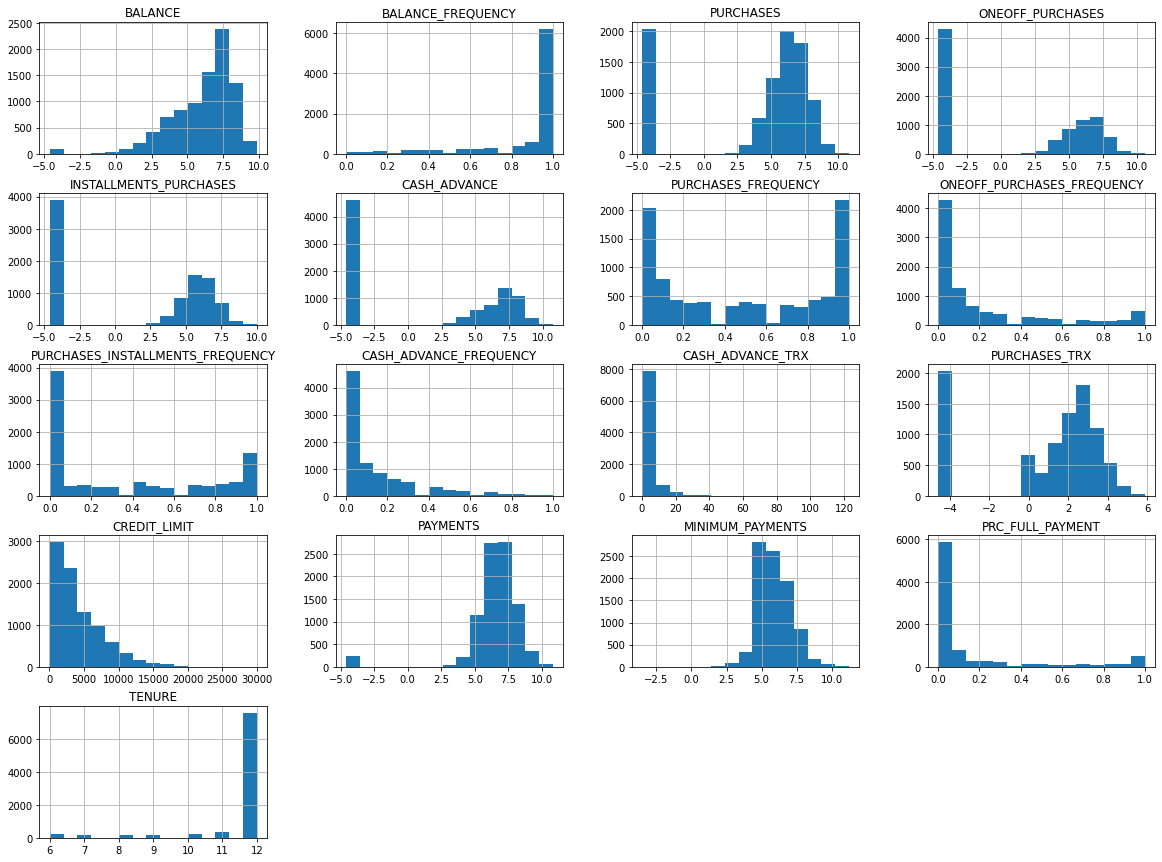

In [38]:
cols=df_new.select_dtypes(include=['object']).columns.tolist()
n_cols=df_new.select_dtypes(exclude=["object"]).columns.tolist()
df_new[n_cols].hist(bins=15,figsize=(20,15),layout=(5,4))


## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

Answer here:

In [11]:
from sklearn import preprocessing
from sklearn.manifold import TSNE 

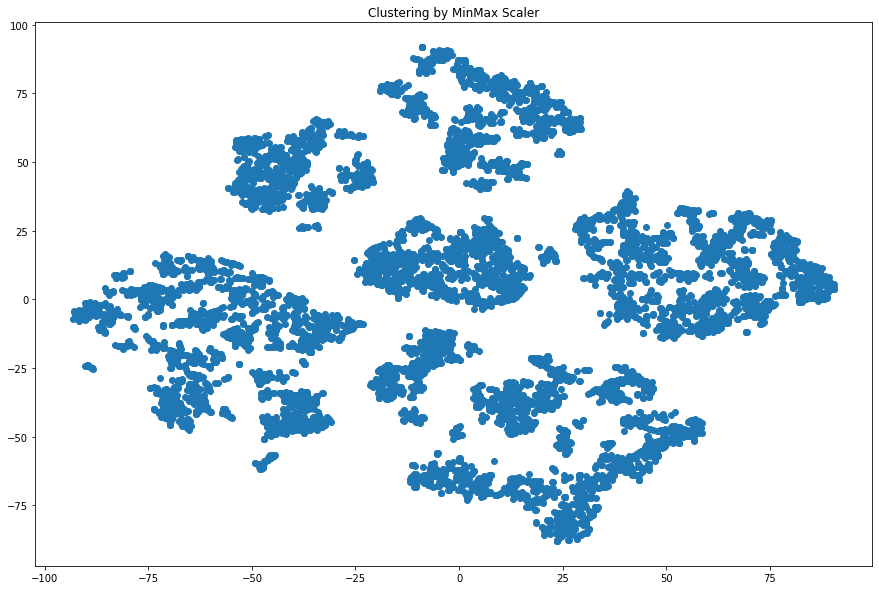

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


df_new_MinMax = pd.DataFrame(scaler.fit_transform(df_new))
tsne = TSNE(n_components=2).fit_transform(df_new_MinMax)

plt.figure(figsize=(15,10))
plt.scatter(tsne[:, 0], tsne[:, 1])
plt.title('Clustering by MinMax Scaler')
plt.show()

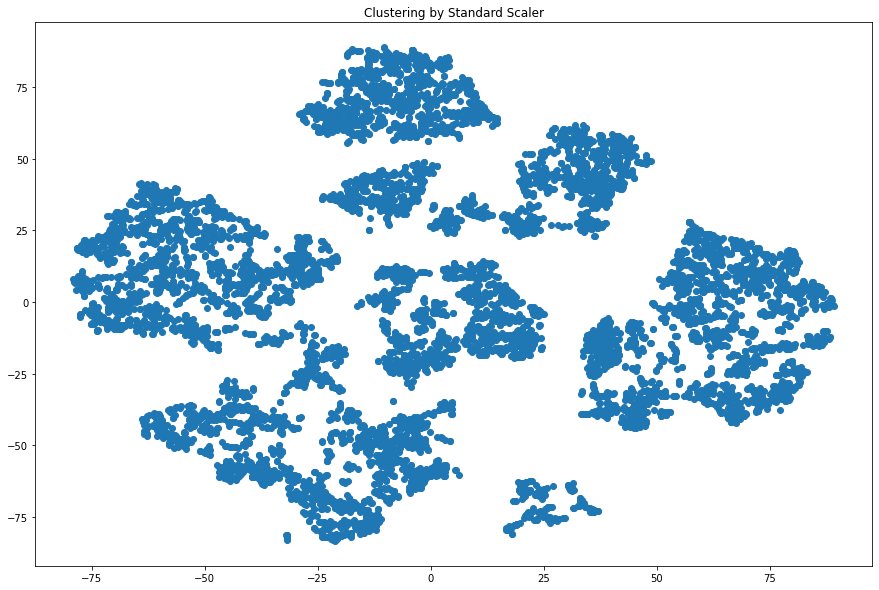

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_new_standard = pd.DataFrame(scaler.fit_transform(df_new))
tsne = TSNE(n_components=2).fit_transform(df_new_standard)

plt.figure(figsize=(15,10))
plt.scatter(tsne[:, 0], tsne[:, 1])
plt.title('Clustering by Standard Scaler')
plt.show()

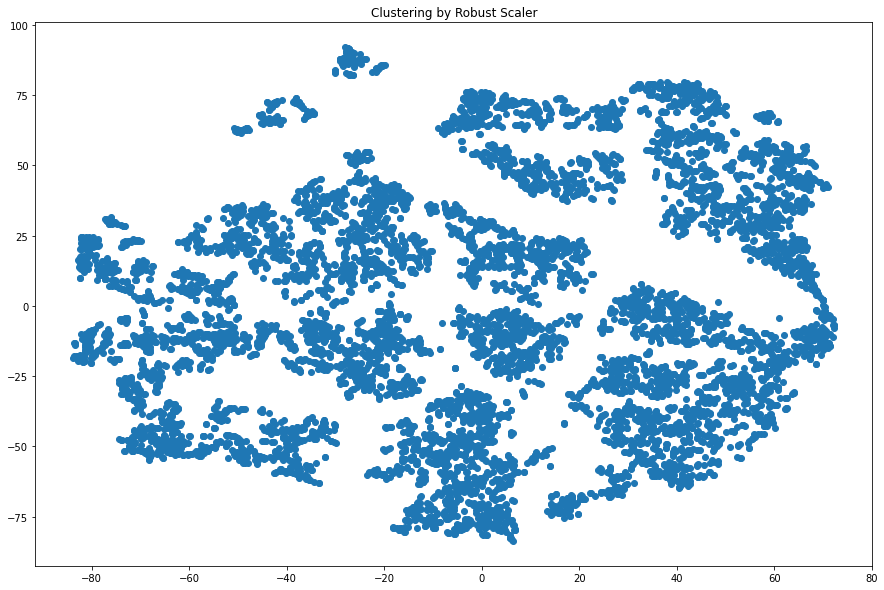

In [41]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_new_robust = pd.DataFrame(scaler.fit_transform(df_new))
tsne = TSNE(n_components=2).fit_transform(df_new_robust)

plt.figure(figsize=(15,10))
plt.scatter(tsne[:, 0], tsne[:, 1])
plt.title('Clustering by Robust Scaler')
plt.show()

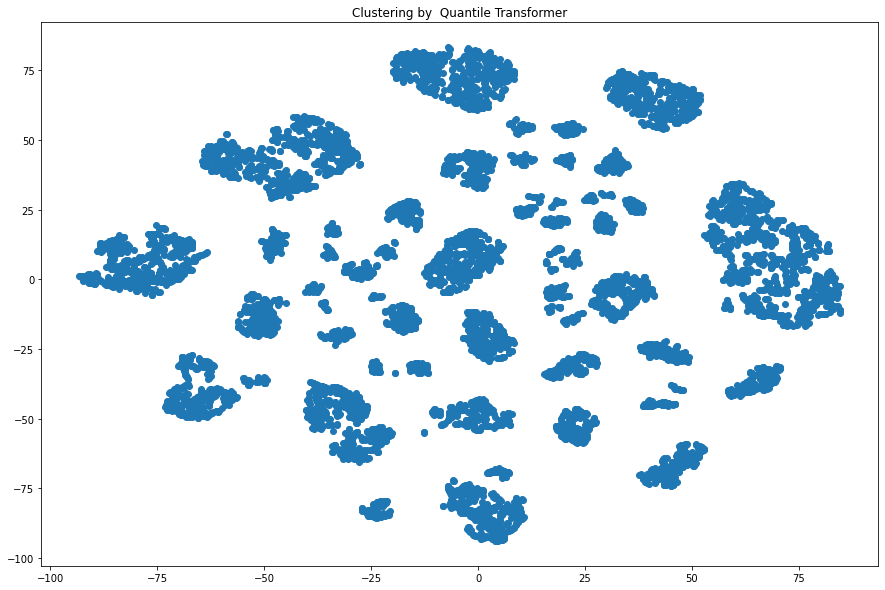

In [42]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()

df_new_quantile = pd.DataFrame(scaler.fit_transform(df_new))
tsne = TSNE(n_components=2).fit_transform(df_new_quantile)

plt.figure(figsize=(15,10))
plt.scatter(tsne[:, 0], tsne[:, 1])
plt.title('Clustering by  Quantile Transformer')
plt.show()

## 5. <a name="5">K Means</a>
(<a href="#5">Go to top</a>)

1- Use the k means class that you implemented in the previous task to cluster this data
2- Use http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html and see if the difference in the result
3- Use elbow method to determine the K (plot the result using two plot one for distorion and another for inertia)
4- (Optionally) make a method that pick the best number of clusters for you 
5- Using different techniques for scaling and comment on the result

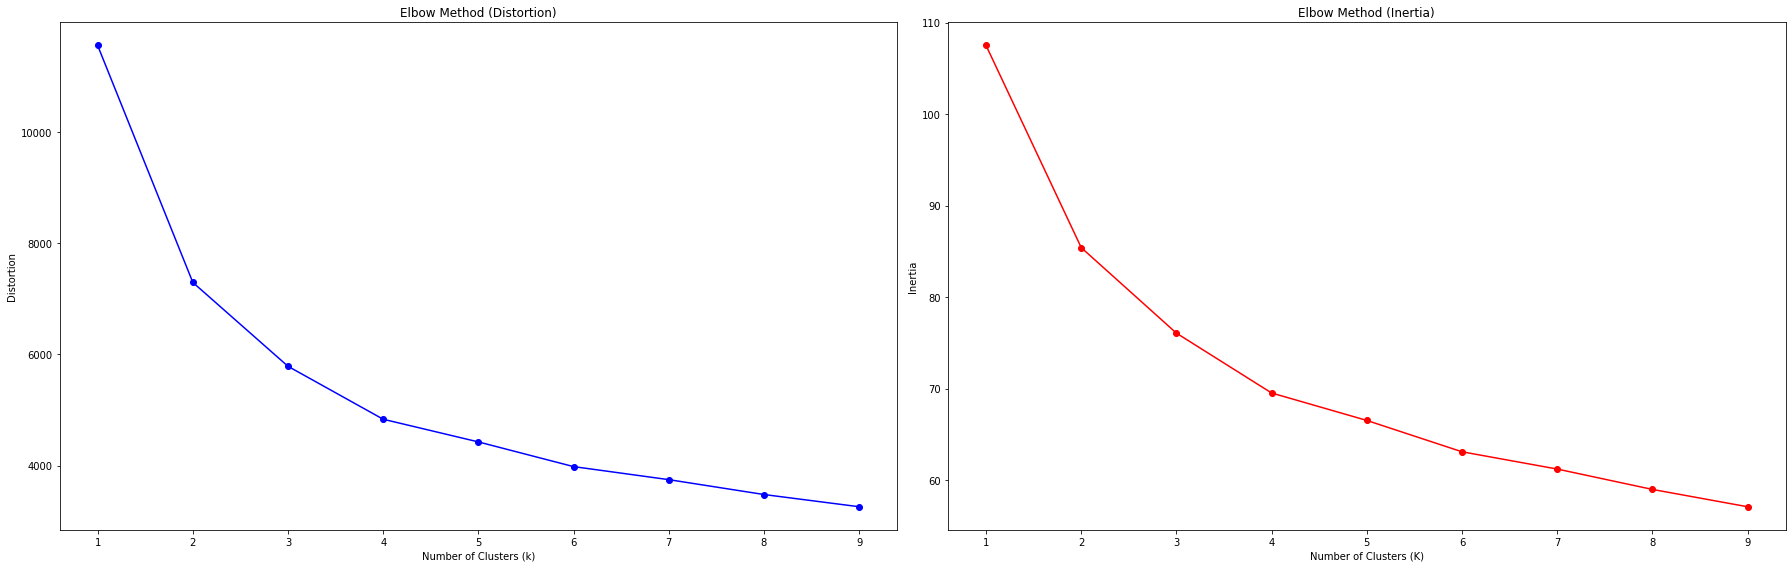

In [13]:
from sklearn.cluster import KMeans

distortions = []
inertias = []

k_values = range(1, 10)

for k in k_values:
    kmeans1 = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(df_new_MinMax)
    distortions.append(kmeans1.inertia_)  # Distortion (sum of squared distances to the nearest centroid)
    inertias.append(np.sqrt(kmeans1.inertia_))  # Inertia (within-cluster sum of squares)

# Plot distortion
plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.plot(k_values, distortions, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method (Distortion)')

# Plot inertia
plt.subplot(1, 2, 2)
plt.plot(k_values, inertias, 'ro-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method (Inertia)')

plt.tight_layout()
plt.show()



In [14]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 10), inertias, curve="convex", direction="decreasing")
kl.elbow

4

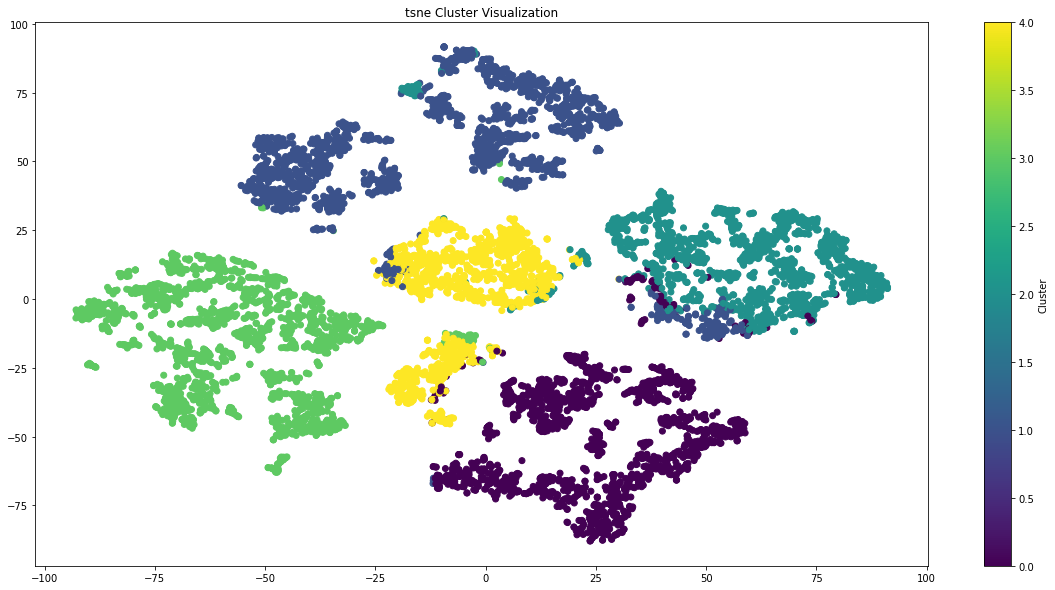

In [15]:
kmeans1 = KMeans(n_clusters=5).fit(df_new_MinMax)

tsne = TSNE(n_components=2).fit_transform(df_new_MinMax)

plt.figure(figsize=(20,10))
plt.scatter(tsne[:, 0], tsne[:, 1],c= kmeans1.predict(df_new_MinMax),  cmap='viridis')
plt.title('tsne Cluster Visualization')
plt.colorbar(label='Cluster')
plt.show()

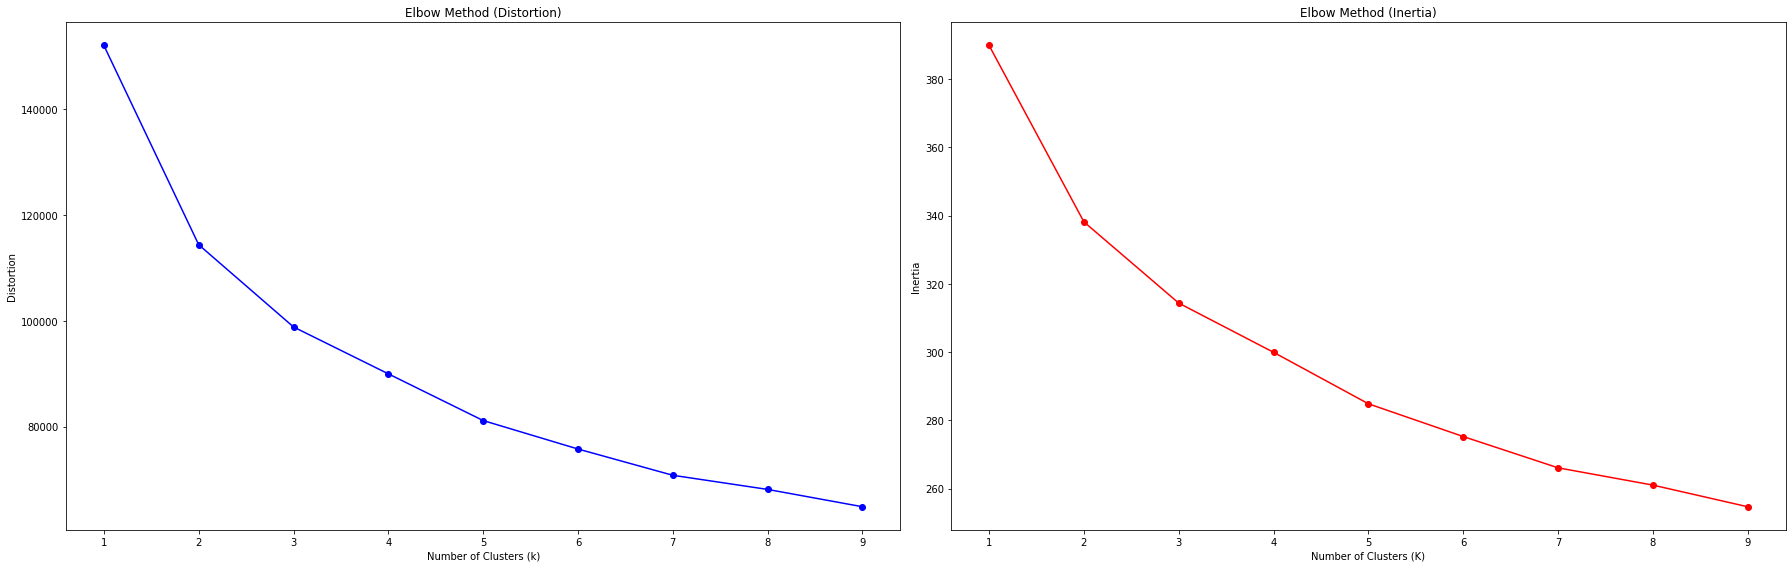

In [48]:
distortions = []
inertias = []

k_values = range(1, 10)

for k in k_values:
    kmeans1 = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(df_new_standard)
    distortions.append(kmeans1.inertia_)  # Distortion (sum of squared distances to the nearest centroid)
    inertias.append(np.sqrt(kmeans1.inertia_))  # Inertia (within-cluster sum of squares)

# Plot distortion
plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.plot(k_values, distortions, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method (Distortion)')

# Plot inertia
plt.subplot(1, 2, 2)
plt.plot(k_values, inertias, 'ro-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method (Inertia)')

plt.tight_layout()
plt.show()


In [49]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 10), inertias, curve="convex", direction="decreasing")
kl.elbow

3

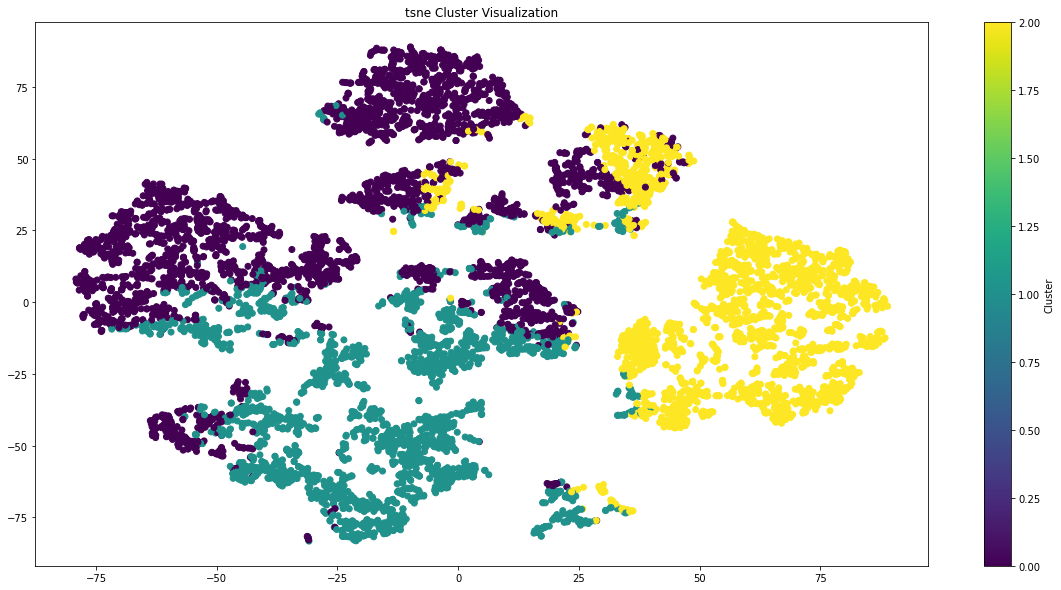

In [64]:
kmeans1 = KMeans(n_clusters=3).fit(df_new_standard)
tsne = TSNE(n_components=2).fit_transform(df_new_standard)

plt.figure(figsize=(20,10))
plt.scatter(tsne[:, 0], tsne[:, 1],c= kmeans1.predict(df_new_standard),  cmap='viridis')
plt.title('tsne Cluster Visualization')
plt.colorbar(label='Cluster')
plt.show()

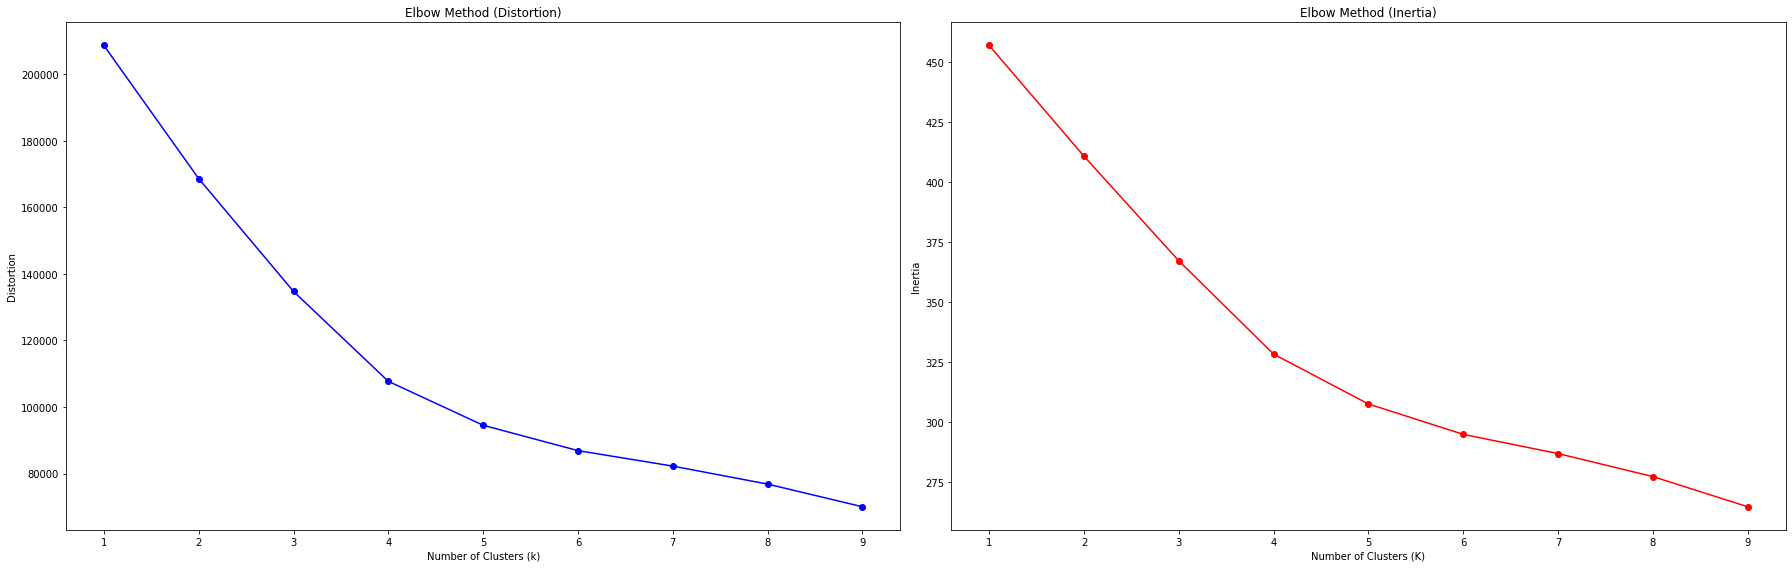

In [65]:
distortions = []
inertias = []

k_values = range(1, 10)

for k in k_values:
    kmeans1 = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(df_new_robust)
    distortions.append(kmeans1.inertia_)  # Distortion (sum of squared distances to the nearest centroid)
    inertias.append(np.sqrt(kmeans1.inertia_))  # Inertia (within-cluster sum of squares)

# Plot distortion
plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.plot(k_values, distortions, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method (Distortion)')

# Plot inertia
plt.subplot(1, 2, 2)
plt.plot(k_values, inertias, 'ro-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method (Inertia)')

plt.tight_layout()
plt.show()

In [66]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 10), inertias, curve="convex", direction="decreasing")
kl.elbow

4

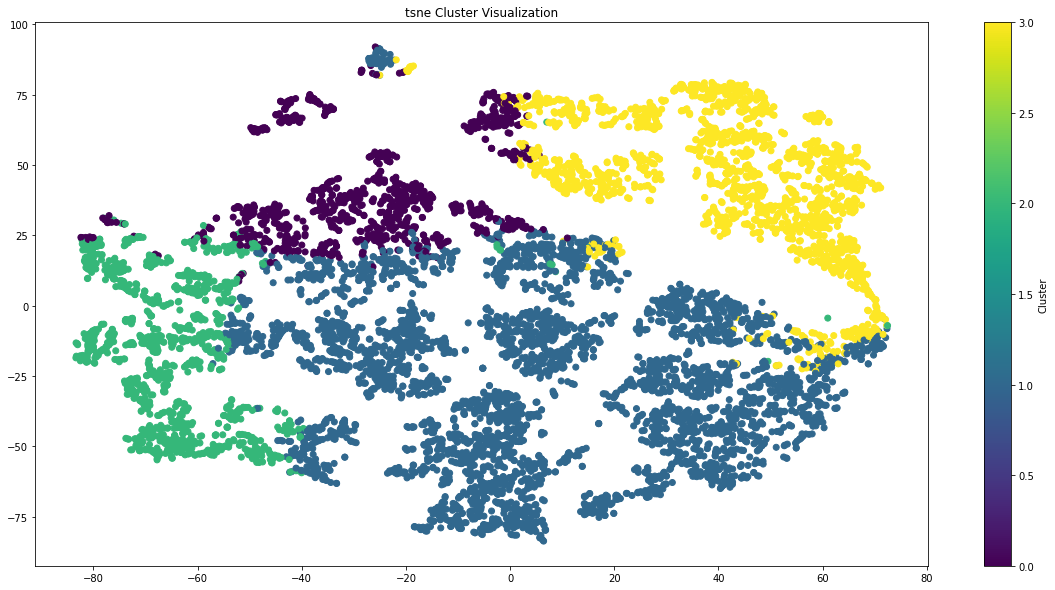

In [67]:
kmeans1 = KMeans(n_clusters=4).fit(df_new_robust)

tsne = TSNE(n_components=2).fit_transform(df_new_robust)

plt.figure(figsize=(20,10))
plt.scatter(tsne[:, 0], tsne[:, 1],c= kmeans1.predict(df_new_robust),  cmap='viridis')
plt.title('tsne Cluster Visualization')
plt.colorbar(label='Cluster')
plt.show()

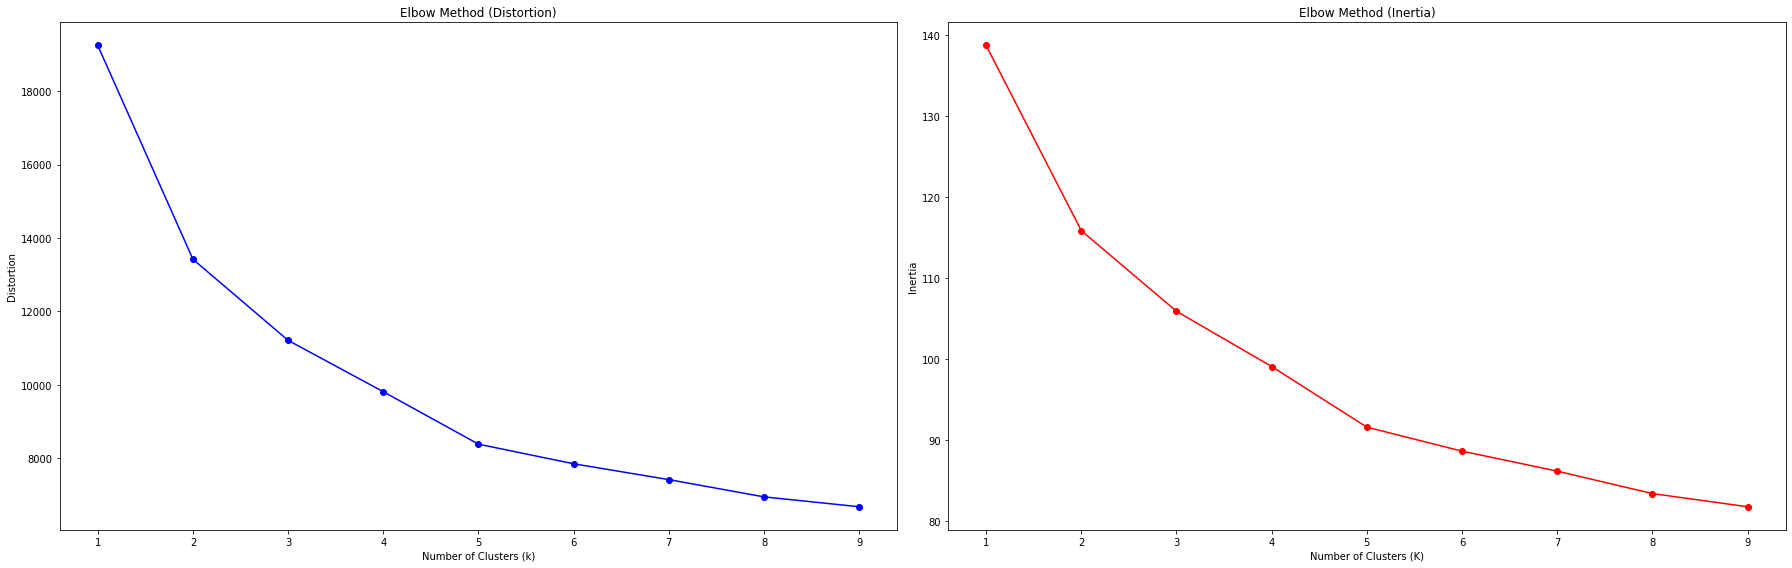

In [68]:
distortions = []
inertias = []

k_values = range(1, 10)

for k in k_values:
    kmeans1 = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(df_new_quantile)
    distortions.append(kmeans1.inertia_)  # Distortion (sum of squared distances to the nearest centroid)
    inertias.append(np.sqrt(kmeans1.inertia_))  # Inertia (within-cluster sum of squares)

# Plot distortion
plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.plot(k_values, distortions, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method (Distortion)')

# Plot inertia
plt.subplot(1, 2, 2)
plt.plot(k_values, inertias, 'ro-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method (Inertia)')

plt.tight_layout()
plt.show()

In [69]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 10), inertias, curve="convex", direction="decreasing")
kl.elbow

5

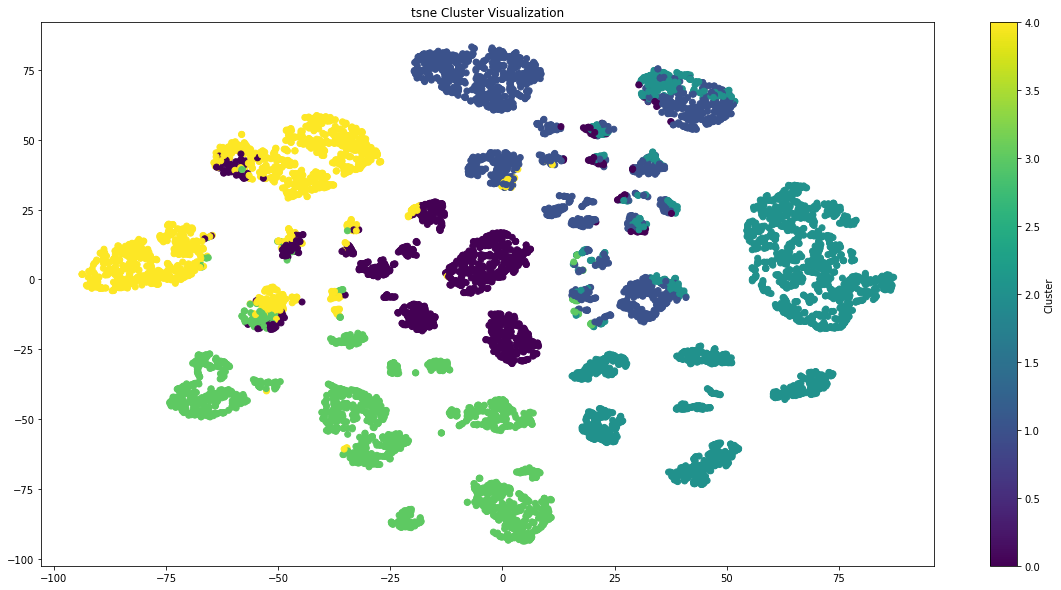

In [70]:
kmeans1 = KMeans(n_clusters=5).fit(df_new_quantile)

tsne = TSNE(n_components=2).fit_transform(df_new_quantile)

plt.figure(figsize=(20,10))
plt.scatter(tsne[:, 0], tsne[:, 1],c= kmeans1.predict(df_new_quantile),  cmap='viridis')
plt.title('tsne Cluster Visualization')
plt.colorbar(label='Cluster')
plt.show()

## 6. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [75]:
from sklearn.metrics import silhouette_score

y = KMeans(n_clusters=5).fit_predict(df_new_MinMax)


silhouette_avg = silhouette_score(df_new_MinMax, y)
silhouette_avg

0.3243337375914411

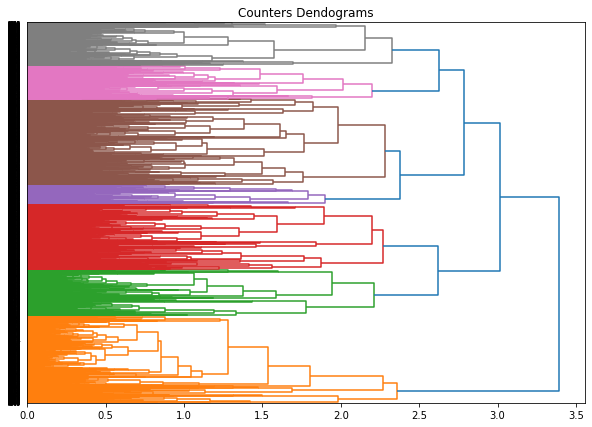

In [76]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_new_MinMax , method= 'complete' ,metric= 'euclidean'),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [77]:
len(set(dend['color_list']))-1

7

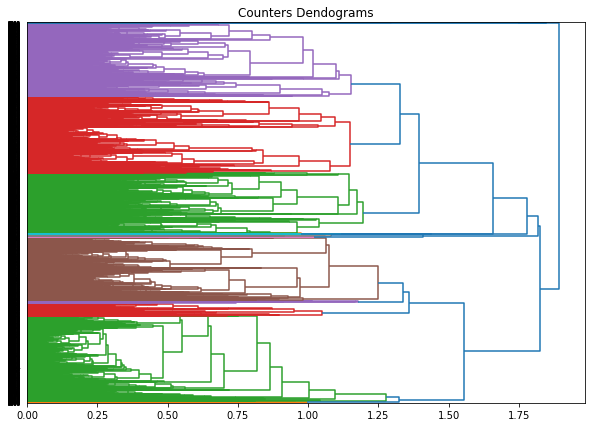

In [78]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_new_MinMax, method= 'average' ,metric= 'euclidean'),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [79]:
len(set(dend['color_list']))-1

9

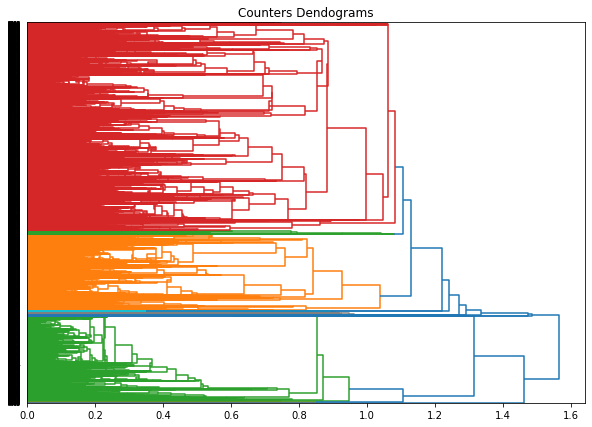

In [75]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_new_MinMax , method= 'centroid' ,metric= 'euclidean'),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [80]:
len(set(dend['color_list']))-1

9

In [46]:
#training
from sklearn.cluster import AgglomerativeClustering

agglomerative_clustering = AgglomerativeClustering(n_clusters=5, linkage='complete').fit(df_new_MinMax)
labels = pd.DataFrame(data= agglomerative_clustering.labels_)
labels = pd.DataFrame(data=agglomerative_clustering.labels_, columns=['cluster #']) 

labels


,cluster #
0,0
1,3
2,1
3,2
4,2
...,...
8937,0
8938,0
8939,0
8940,3


## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 

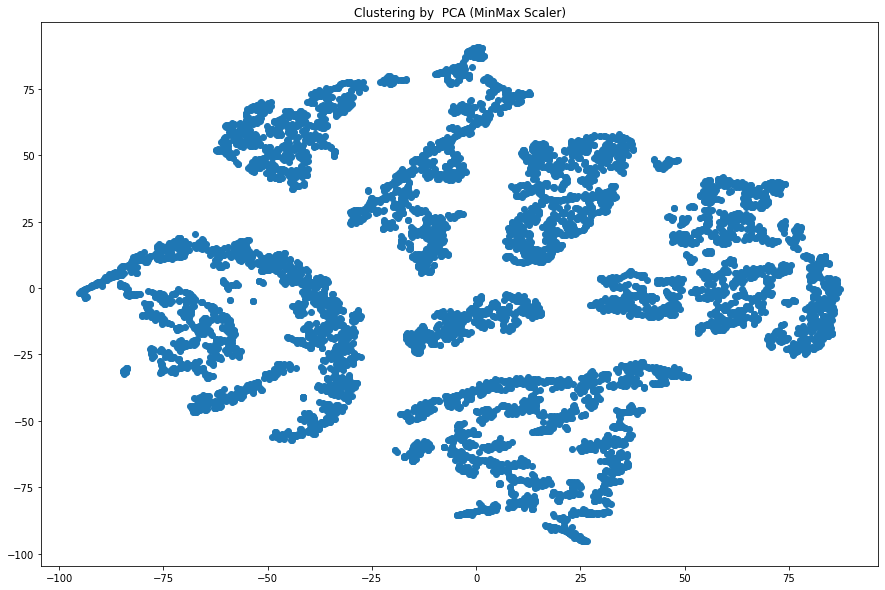

In [103]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=4).fit_transform(df_new_MinMax)

tsne = TSNE(n_components=2).fit_transform(pca1)

plt.figure(figsize=(15,10))
plt.scatter(tsne[:, 0], tsne[:, 1])
plt.title('Clustering by  PCA (MinMax Scaler)')
plt.show()


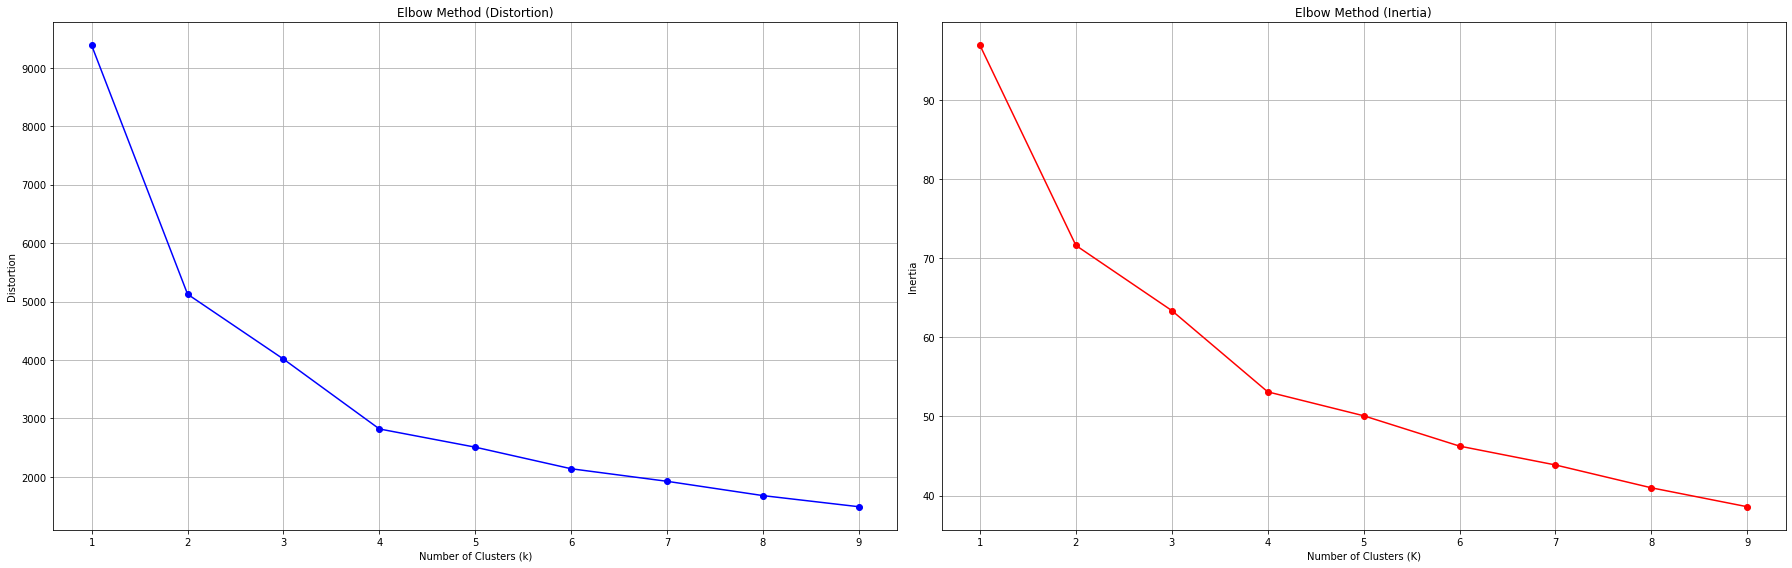

In [105]:
distortions = []
inertias = []

k_values = range(1, 10)

for k in k_values:
    kmeans1 = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(pca1)
    distortions.append(kmeans1.inertia_)  # Distortion (sum of squared distances to the nearest centroid)
    inertias.append(np.sqrt(kmeans1.inertia_))  # Inertia (within-cluster sum of squares)

# Plot distortion
plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.plot(k_values, distortions, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method (Distortion)')
plt.grid()

# Plot inertia
plt.subplot(1, 2, 2)
plt.plot(k_values, inertias, 'ro-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method (Inertia)')
plt.grid()
plt.tight_layout()
plt.show()

In [86]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 10), inertias, curve="convex", direction="decreasing")
kl.elbow

4

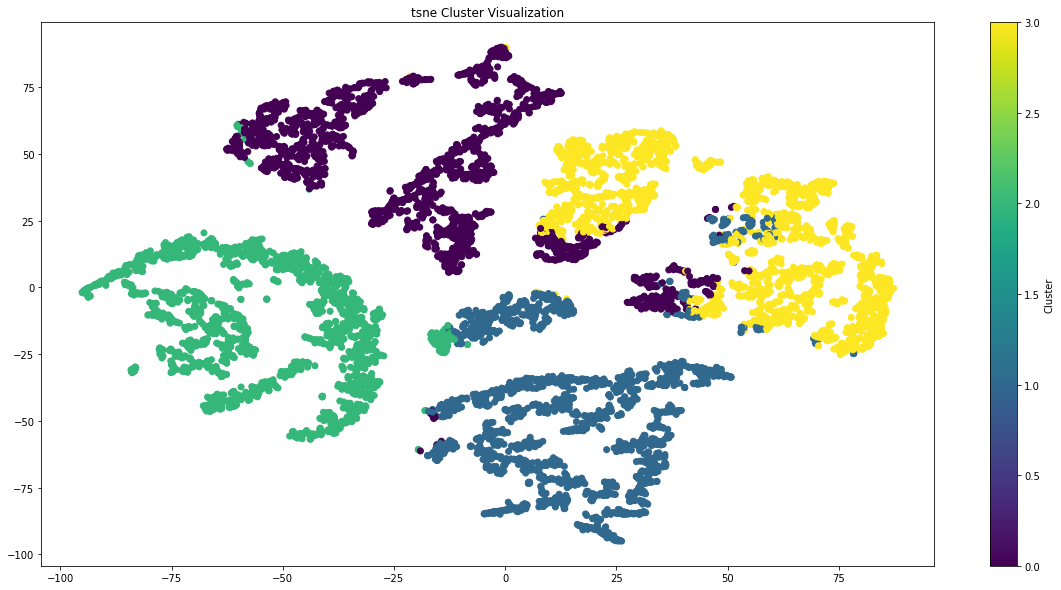

In [87]:
kmeans1 = KMeans(n_clusters=4).fit(pca1)

tsne = TSNE(n_components=2).fit_transform(pca1)

plt.figure(figsize=(20,10))
plt.scatter(tsne[:, 0], tsne[:, 1],c= kmeans1.predict(pca1),  cmap='viridis')
plt.title('tsne Cluster Visualization')
plt.colorbar(label='Cluster')
plt.show()

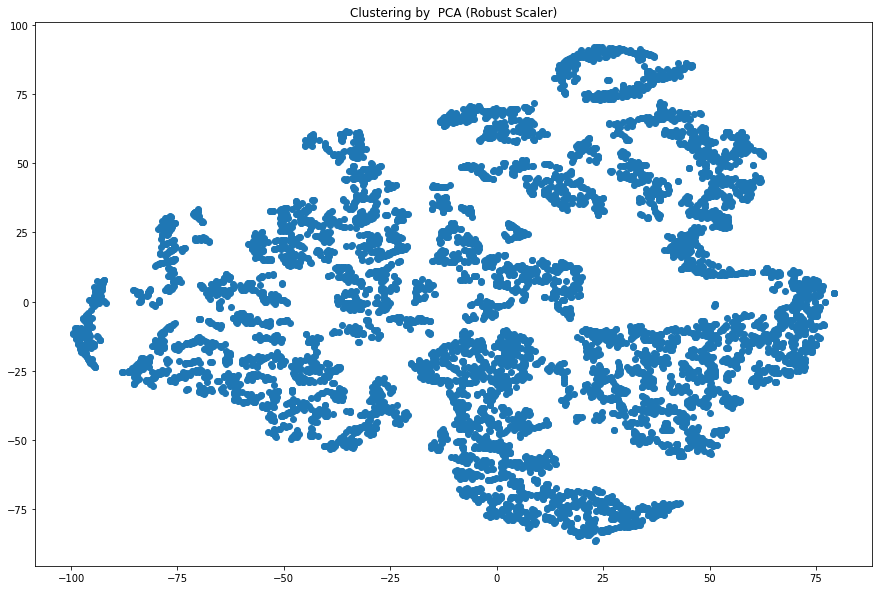

In [106]:
from sklearn.decomposition import PCA

pca2 = PCA(n_components=5).fit_transform(df_new_robust)

tsne = TSNE(n_components=2).fit_transform(pca2)

plt.figure(figsize=(15,10))
plt.scatter(tsne[:, 0], tsne[:, 1])
plt.title('Clustering by  PCA (Robust Scaler)')
plt.show()

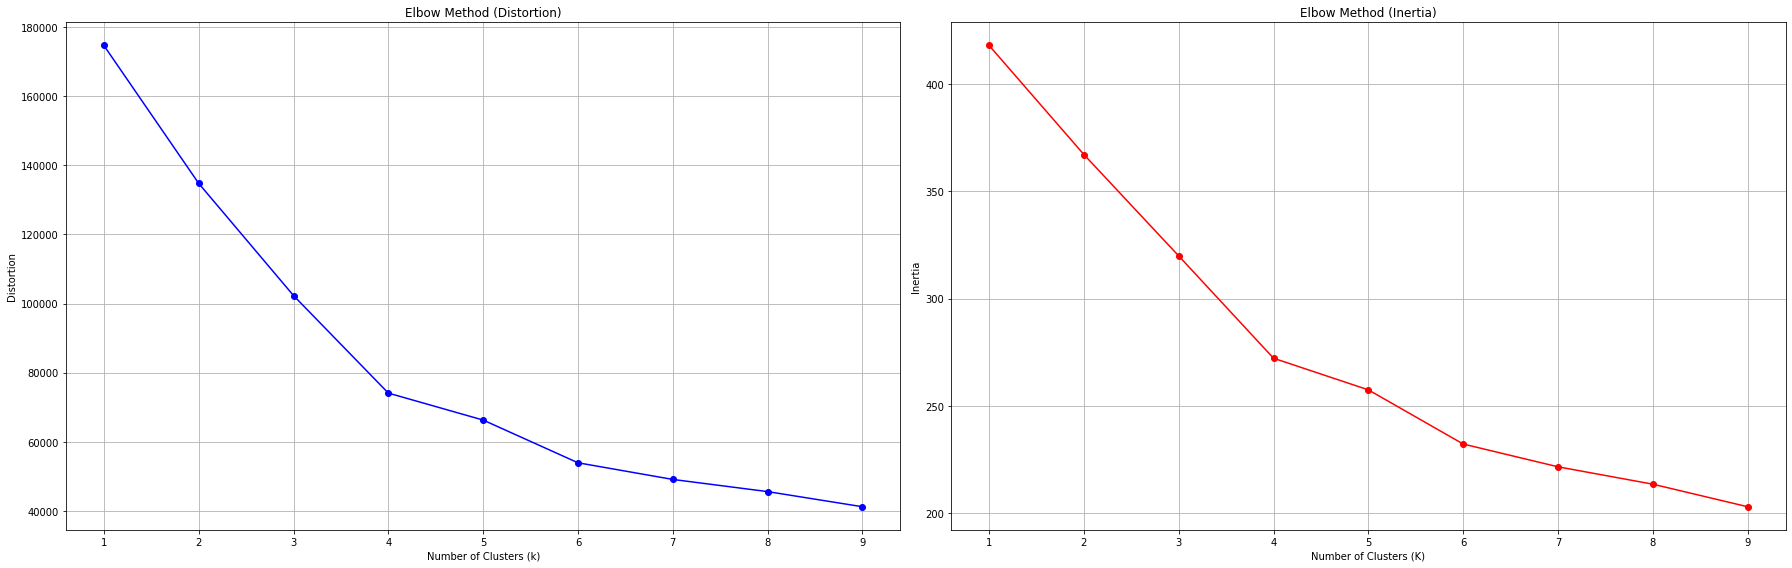

In [107]:
distortions = []
inertias = []

k_values = range(1, 10)

for k in k_values:
    kmeans1 = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(pca2)
    distortions.append(kmeans1.inertia_) 
    inertias.append(np.sqrt(kmeans1.inertia_))  

# Plot distortion
plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.plot(k_values, distortions, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method (Distortion)')
plt.grid()

# Plot inertia
plt.subplot(1, 2, 2)
plt.plot(k_values, inertias, 'ro-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method (Inertia)')
plt.grid()
plt.tight_layout()
plt.show()

In [90]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 10), inertias, curve="convex", direction="decreasing")
kl.elbow

4

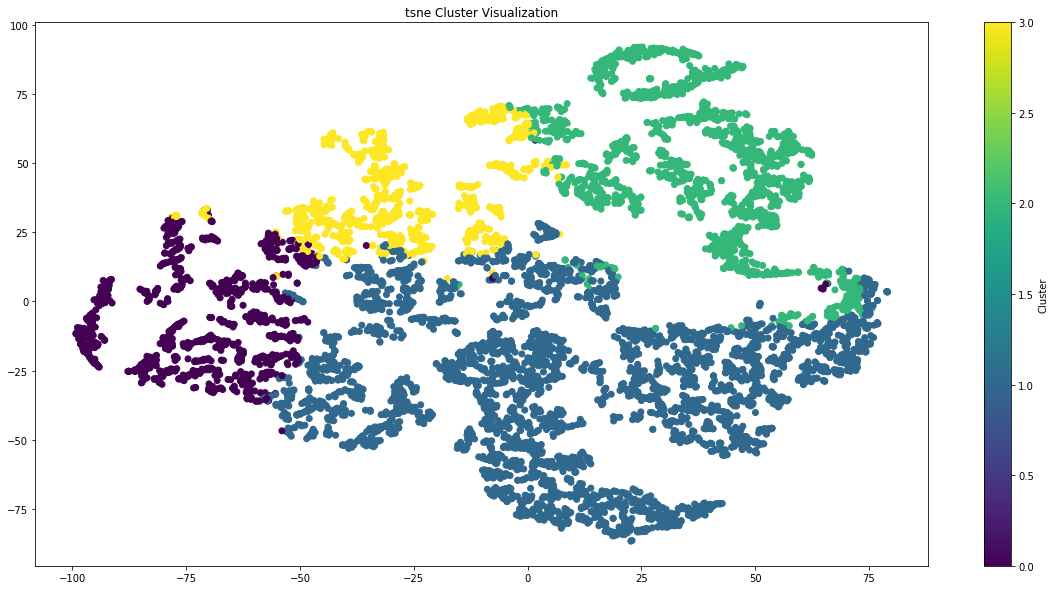

In [91]:
kmeans1 = KMeans(n_clusters=4).fit(pca2)

tsne = TSNE(n_components=2).fit_transform(pca2)

plt.figure(figsize=(20,10))
plt.scatter(tsne[:, 0], tsne[:, 1],c= kmeans1.predict(pca2),  cmap='viridis')
plt.title('tsne Cluster Visualization')
plt.colorbar(label='Cluster')
plt.show()

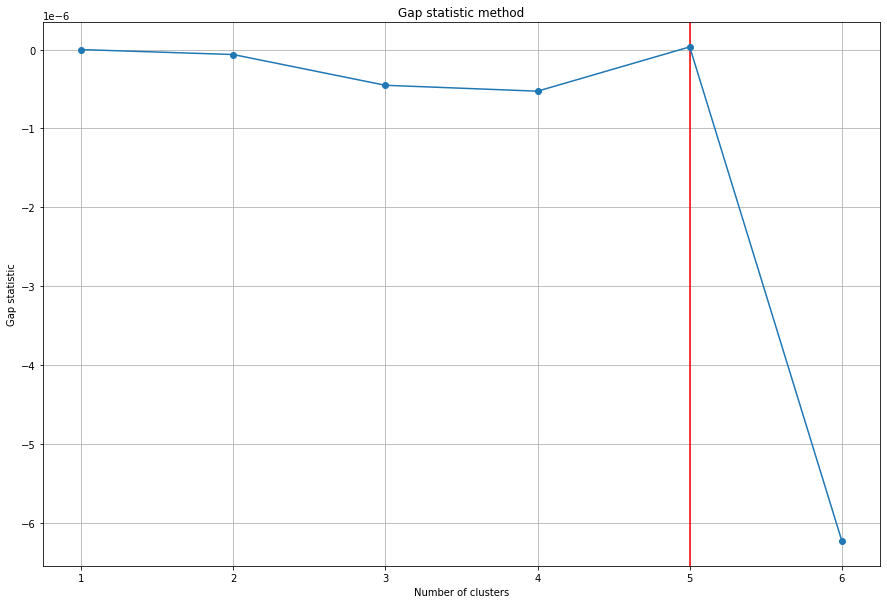

In [161]:
def calculate_gap(data, nrefs=3, max_clusters=7):
    gaps = np.zeros((len(range(1, max_clusters)),))
    resultsdf = pd.DataFrame({'cluster_count':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, max_clusters)):
        km = KMeans(n_clusters=k)
        km.fit(data)        
        ref_disps = []

        for i in range(nrefs):
            ref_disp = KMeans(n_clusters=k).fit(data).inertia_
            ref_disps.append(ref_disp)
            
        gap = np.mean(np.log(ref_disps)) - np.log(km.inertia_)
        gaps[gap_index] = gap
        resultsdf = resultsdf.append({'cluster_count': k, 'gap': gap}, ignore_index=True)
    return gaps, resultsdf


gaps, resultsdf = calculate_gap(pca1)
optimal_k = np.argmax(gaps) + 1

plt.figure(figsize=(15, 10))
plt.axvline(x= optimal_k, color='r', linestyle='-')
plt.plot(range(1, len(gaps) + 1), gaps, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Gap statistic')
plt.title('Gap statistic method')
plt.grid()
plt.show()


In [103]:
df_copy1 = df_copy.reset_index(drop=True)
df_copy1['cluster #']=labels['cluster #']
df_copy1['cluster #'] = df_copy1['cluster #'].astype(int)
df_copy1

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster #
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,2
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8937,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8938,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6,0
8939,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8940,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,3


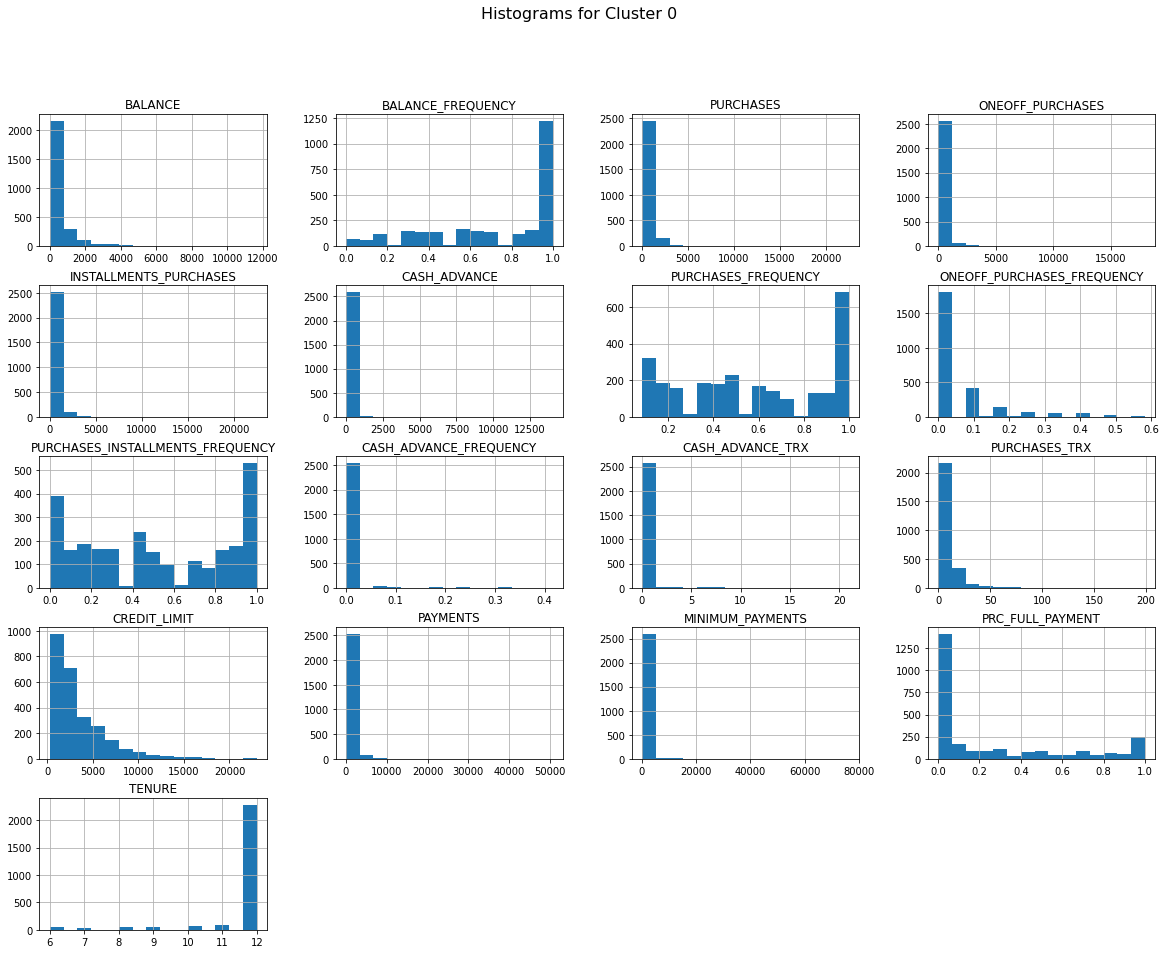

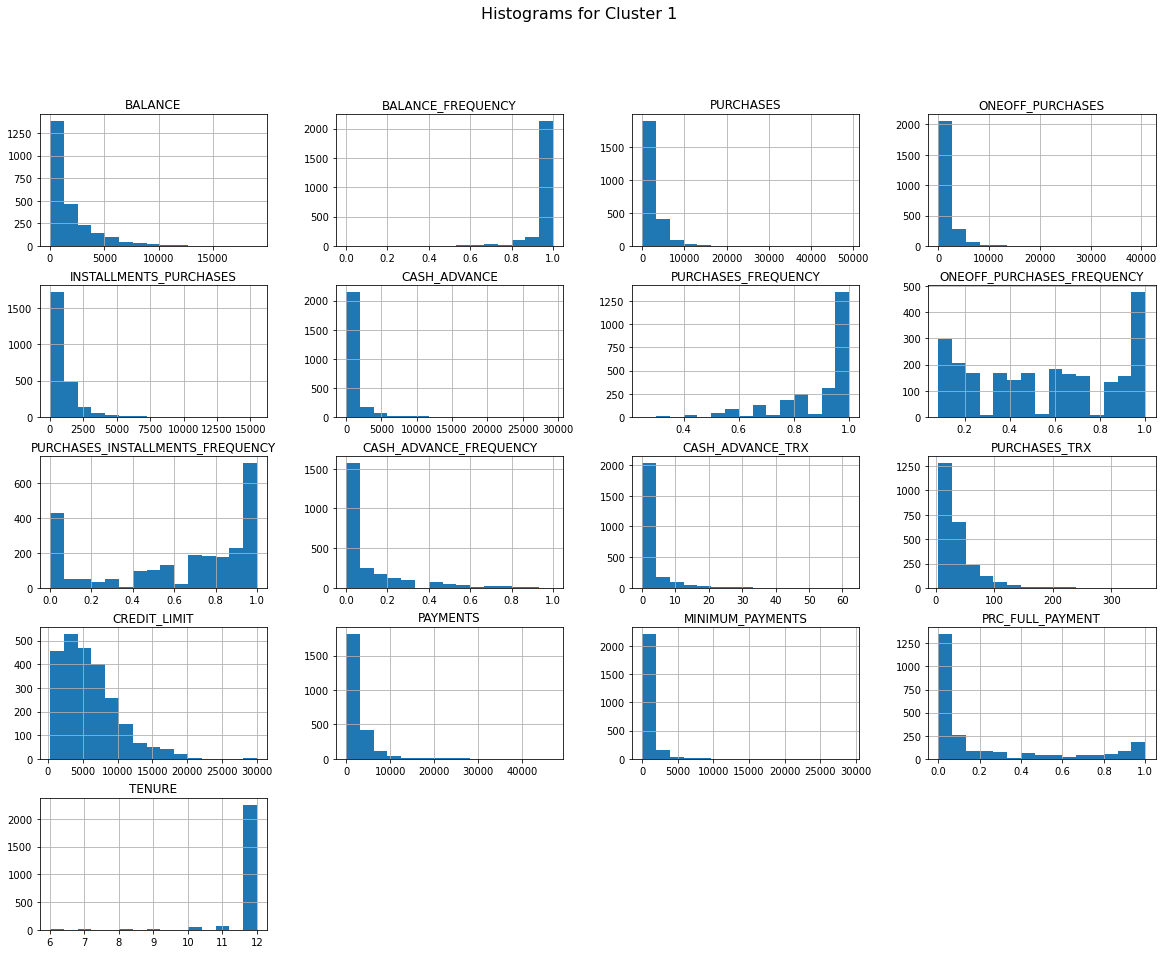

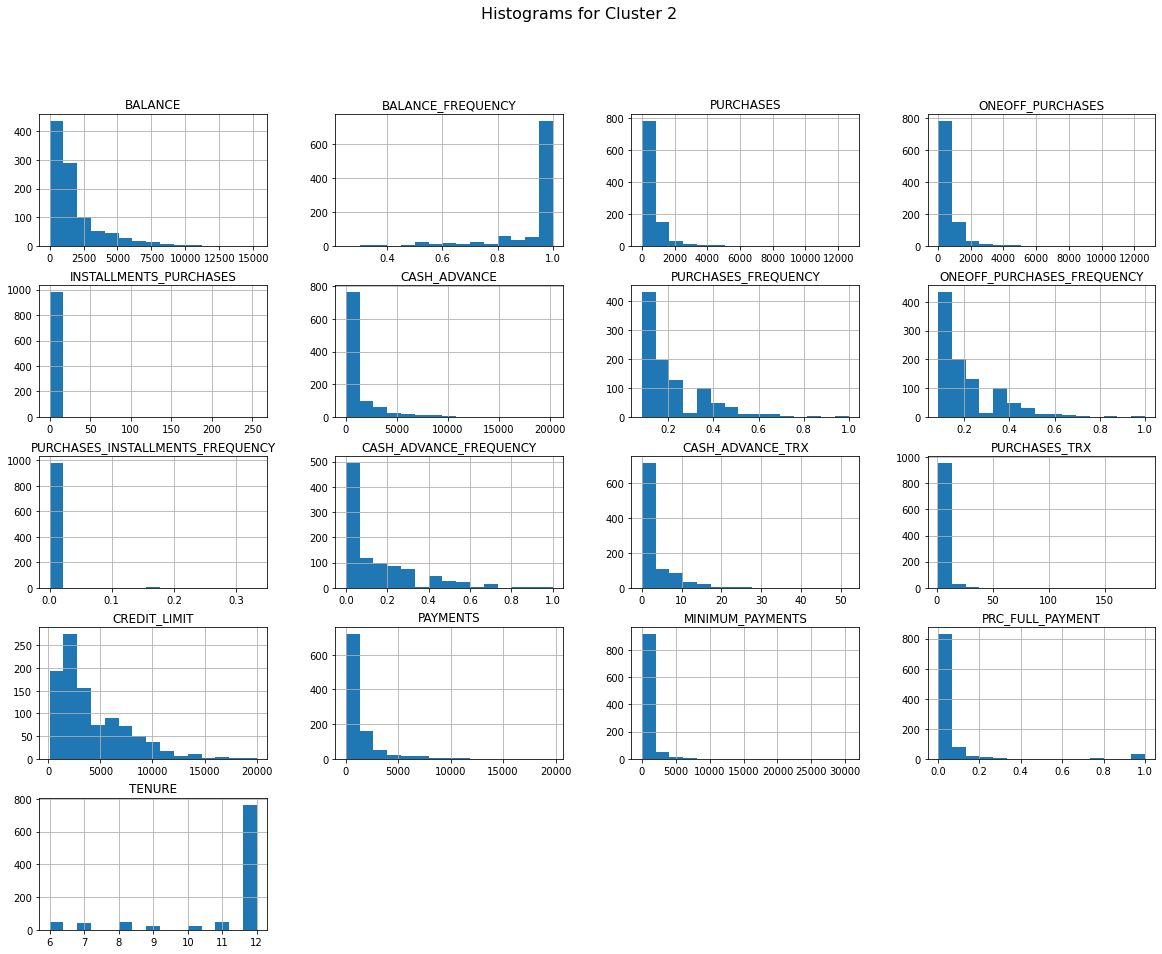

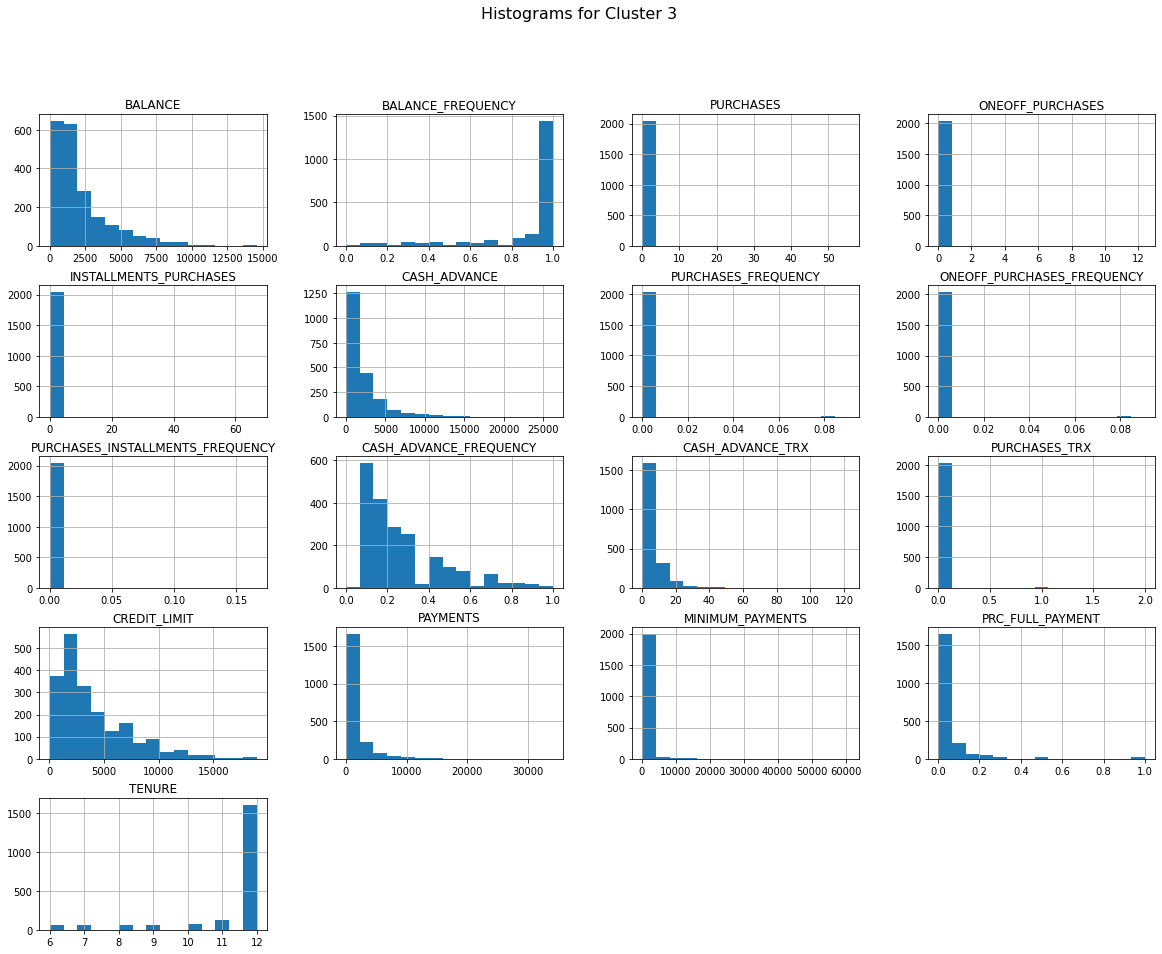

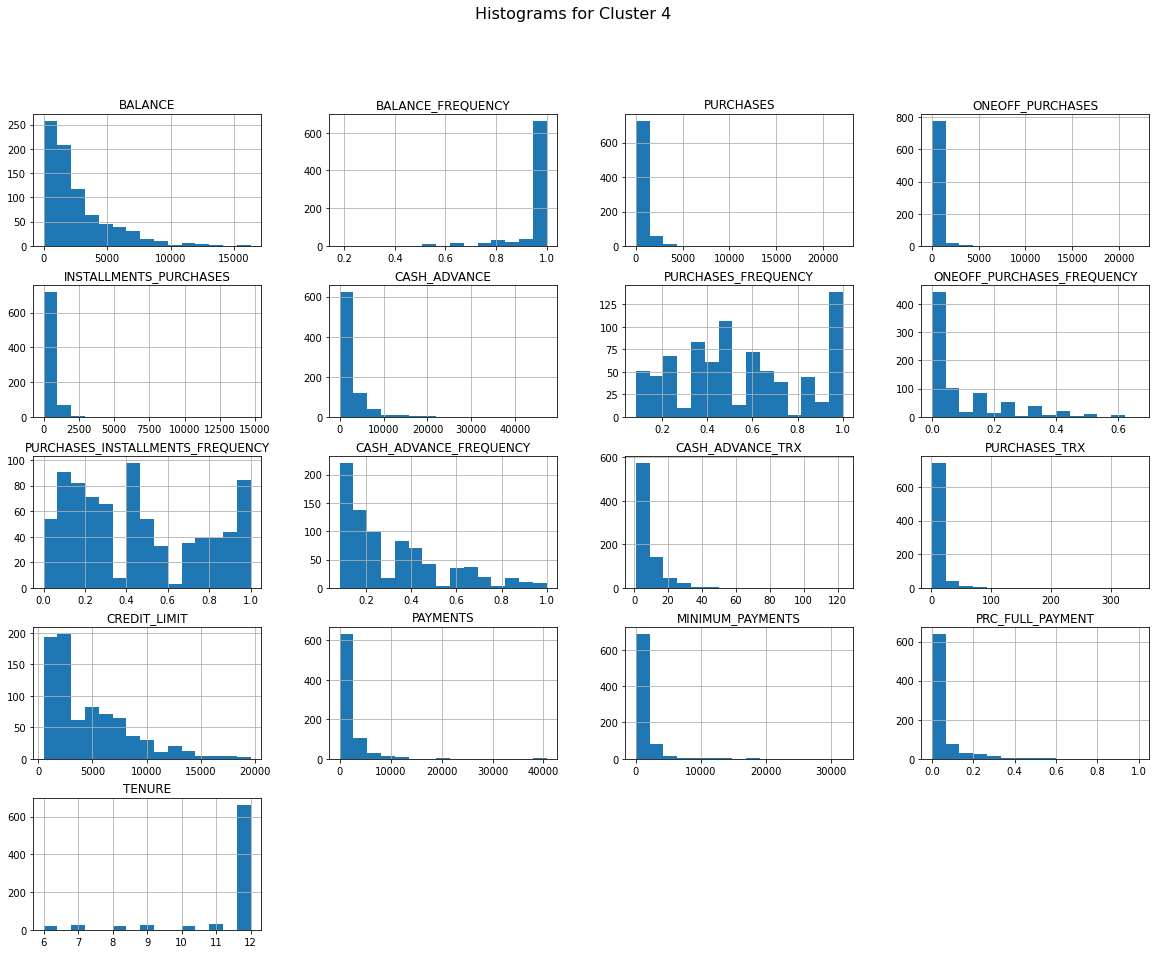

In [104]:
n_cols = df_copy1.select_dtypes(exclude=["object"]).columns.tolist()[:-1]

for cluster_num in range(5):
    cluster_df = df_copy1[df_copy1['cluster #'] == cluster_num]
    cluster_df[n_cols].hist(bins=15, figsize=(20, 15), layout=(5, 4))
    plt.suptitle(f'Histograms for Cluster {cluster_num}', fontsize=16)
    plt.show()

In [ ]:
"""
cluster 0: customers that have low purchases and also they have no cash advance 

cluster 1: the customers that purchases more frequently in one-go 

cluster 2: customers that has zero purchases done in installment  

cluster 3: customers that their goof Balance amount left in their account and have low purchases 

cluster 4: customers that have low purchases and they don't make any installment frequencies

"""
